<a href="https://colab.research.google.com/github/Helga-karelia/analitic_TGU/blob/main/%D0%9A%D0%BE%D1%87%D0%B5%D1%82%D1%8B%D0%B3%D0%BE%D0%B2%D0%B0%D0%9E%D0%92_%D0%A1%D1%82%D0%B0%D0%B6%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0_%D0%A2%D0%93%D0%A3_%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Бизнес-анализ: описание кейса**


К нам обратился клиент, который занимается сборкой и продажей персональных компьютеров (за исключением мини-ПК и моноблоков). В связи с ростом популярности интернет-магазинов, таких как Wildberries, Ozon, OnlineTrade и т.п., за последние несколько лет, а также с целью привлечения большего числа клиентов при одновременном снижении затрат на содержание собственного магазина, доставку и рекламу товаров на 10% он планирует выйти на онлайн-рынок в ближайшие 3 месяца. В связи с этим клиент хотел бы узнать, от чего зависит цена, а также популярность персональных компьютеров, выкладываемых на онлайн-площадках, чтобы в дальнейшем планировать к сборке востребованные по техническим характеристикам компьютеры и продавать их по конкурентной цене.
Специалистом по сбору данных были выгружены датасеты с одного из популярных онлайн-магазинов, содержащие информацию о товарах категории «Компьютеры и моноблоки».
Проанализируйте полученные данные и представьте аналитический отчет, содержащий выводы и рекомендации для Заказчика, которые помогут ему для решения его бизнес-задач.



**задача** -  проанализировать цену и популярность (выраженную в количестве продаж) персональных компьютеров, а также выявить зависимость этих показателей от комплектующих.


# **2. Изучение данных**

Импорт бибилиотек и подгрузка файла

In [1]:
import numpy as np #работа с многомерными массивами
import pandas as pd #работа с числовыми таблицами и временными рядами
import matplotlib.pyplot as plt #визуализация (графики)
import scipy #пакет прикладных математических процедур
import scipy.stats as stats #статистические функции/критерии
import seaborn as sns #статистические графики
import math #математические операции с числами
import re
import json

In [2]:
!pip install --upgrade gdown

https://drive.google.com/file/d/1yMocovhACbudsJe7IaXfNa6IV-hc0MlJ/view?usp=sharing

In [3]:
!gdown --id 1yMocovhACbudsJe7IaXfNa6IV-hc0MlJ

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1yMocovhACbudsJe7IaXfNa6IV-hc0MlJ
To: /content/wb_pc_hard.csv
100% 3.97M/3.97M [00:00<00:00, 80.8MB/s]


In [4]:
# загрузим и посмотрим на датасет
dataset = pd.read_csv('wb_pc_hard.csv')
dataset.head()

,product_id,title,price,sales,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система,Гарантийный срок,Страна производства,Габариты товара,Габариты товара (с упаковкой)
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805₽,Купили более 400 раз,7 отзывов,NaN,NaN,"{'Процессор_тип': 'Intel Celeron', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics,отсутствует,3года,Россия,"{'Ширина предмета': '28.5 см', 'Глубина предме...","{'Длина упаковки': '43.5 см', 'Ширина упаковки..."
1,17877962,Системный блок,32900₽,NaN,0 отзывов,NaN,NaN,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Китай,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '43 см', 'Ширина упаковки':..."
2,17880420,Компьютер Hp Prodesk 400 g6 mt,35720₽,NaN,0 отзывов,NaN,NaN,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,NaN,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': None, 'Ширина упаковки': No..."
3,19347937,Офисный Компьютер Robotcomp Казначей V1,39237₽,Купили более 10 раз,1 отзыв,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel UHD Graphics 630,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '28 см', 'Глубина предмета...","{'Длина упаковки': '60 см', 'Ширина упаковки':..."
4,19348951,Игровой Компьютер Robotcomp М16 2.0 V1,76188₽,Купили более 200 раз,94 отзыва,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1660,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '20 см', 'Глубина предмета...","{'Длина упаковки': '50 см', 'Ширина упаковки':..."


In [5]:
# тип объекта
type(dataset)

pandas.core.frame.DataFrame

In [6]:
# размеры датасета
dataset.shape

(4500, 16)

In [7]:
# информация о датасете:
# количество записей,
# количество столбцов,
# наименование признаков,
# количество заполненных (не пустых) значений по каждому признаку,
# тип данных по каждому признаку,
# объем занимаемой памяти
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     4500 non-null   int64  
 1   title                          4500 non-null   object 
 2   price                          4499 non-null   object 
 3   sales                          1164 non-null   object 
 4   feedbacks                      4500 non-null   object 
 5   seller                         4391 non-null   object 
 6   seller_rating                  4389 non-null   float64
 7   Процессор                      4500 non-null   object 
 8   Оперативная память             4500 non-null   object 
 9   Жесткий диск                   4500 non-null   object 
 10  Видеопроцессор                 4500 non-null   object 
 11  Операционная система           4500 non-null   object 
 12  Гарантийный срок               2648 non-null   o

# **3. Предобработка данных**

In [8]:
# проверка на дубликаты: выдает объект Series с булевыми значениями True/False
dataset.duplicated().sum()

490

In [9]:
# проверка на пропущенные значения. Нас интересует, в первую очередь, количество пропущенных значений
# т.к. True = 1, False = 0, то необходимо сложить все значения по столбцам данного объекта DataFrame
dataset.isna().sum()

,0
product_id,0
title,0
price,1
sales,3336
feedbacks,0
seller,109
seller_rating,111
Процессор,0
Оперативная память,0
Жесткий диск,0


**3.1. Выявление проблем:**

# **3.1. Выявление проблем**


1. Поскольку нам необходимо проанализировать цену и популярность (выраженную в
количестве продаж) персональных компьютеров, а также выявить зависимость
этих показателей от комплектующих, то имеются такие признаки,  не представляющие ценности в рамках кейса ('seller', 'Гарантийный срок', 'Страна производства', 'Габариты товара', 'Габариты товара (с упаковкой)')
Признаки Рейтинг продавца (seller_rating), Продавец (seller) не влияют на продажи ПК и не несут ценной информации для анализа. Признак Количество отзывов (feedbacks) не дает понимания, положительными они являются или отрицательными, их количество не даёт информации для определения цены и популярности персональных компьютеров.
2. Имеются дубликаты
3. Имеются незаполненные значения ('price', 'sales', 'seller_rating', 'Гарантийный срок', 'Страна производства')
4. Наличие вложенных значений (словарей по признакам 'Процессор', 'Оперативная память', 'Жесткий диск')
5. Приведение признаков в необходимый формат (в int: цену из признака 'price', признак 'sales' в интервальный)

Возможные другие проблемы, которые могут быть выявлены в процессе предобработки данных

In [10]:
# Перед проведением манипуляций создадим копию исходного датасета в отдельную переменную,
# чтобы в случае необходимости или ошибки при обработке  вернуться к исходной версии
df_copy = dataset.copy()

In [11]:
# создим список "ненужных" колонок
columns = ['seller', 'feedbacks','seller_rating','Гарантийный срок', 'Страна производства', 'Габариты товара', 'Габариты товара (с упаковкой)']

In [12]:
# удалим ненужные колонки, и перезапишим датафрейм
df_copy.drop(columns=columns, inplace=True)

In [13]:
# проверим что получилось
df_copy.head()

,product_id,title,price,sales,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805₽,Купили более 400 раз,"{'Процессор_тип': 'Intel Celeron', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics,отсутствует
1,17877962,Системный блок,32900₽,NaN,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует
2,17880420,Компьютер Hp Prodesk 400 g6 mt,35720₽,NaN,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует
3,19347937,Офисный Компьютер Robotcomp Казначей V1,39237₽,Купили более 10 раз,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel UHD Graphics 630,windows пробная
4,19348951,Игровой Компьютер Robotcomp М16 2.0 V1,76188₽,Купили более 200 раз,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1660,windows пробная


In [14]:
# посмотрим, есть ли дублирующиеся id
df_copy.duplicated(subset='product_id').sum()

490

In [15]:
# исключение дубликатов по столбцу
df_copy.drop_duplicates(subset='product_id', inplace=True)

In [16]:
# проверим размер датафрейма
df_copy.shape

(4010, 9)

In [17]:
# проверим новый датасет на пропущенные значения.
df_copy.isna().sum()

,0
product_id,0
title,0
price,1
sales,2975
Процессор,0
Оперативная память,0
Жесткий диск,0
Видеопроцессор,0
Операционная система,0


In [18]:
# Расчитаем количество пропущенных значений в процентах
df_copy.isnull().mean()*100

,0
product_id,0.000000
title,0.000000
price,0.024938
sales,74.189526
Процессор,0.000000
Оперативная память,0.000000
Жесткий диск,0.000000
Видеопроцессор,0.000000
Операционная система,0.000000


# **3.2. Обзор пропущенных значений**


1. 'price' - всего одно пропущенное значение, (по кейсу нет необходимости в исключении пропущенных значений; восстановить пропуск нет возможности)
2. 'sales' - должно быть указано значение количества покупок. 'sales' содержит почти 75% пропусков. Указанный признак важен для анализа датасета, так как клиент хочет узнать популярность персональных компьютеров, выкладываемых на онлайн-площадках, то есть какие компьюитеры покупают наиболее часто. Если у нас продано только 25 % от всего датасета, то результат анализа может быть не информативен, возможно этот товар не покупали или имелась ошибка в в базе данных, либо при выгрузке данных в файл; при этом по кейсу не указана необходимость в исключении пропущенных значений.



In [19]:
# исключим наблюдение с пропущенной ценой по признаку 'price'
df_copy.dropna(subset='price', inplace=True)

In [20]:
# проверим размер датафрейма
df_copy.shape

(4009, 9)

# **3.3. Исключение признаков, не представляющих ценности в рамках кейса**



По условиям задачи клиент, занимается сборкой и продажей персональных компьютеров за исключением мини-ПК и моноблоков. Поэтому необходимо исключить данный товар из датасета.



In [21]:
# Приведем данные признака title к нижнему регистру
df_copy['title'] = df_copy['title'].str.lower()
# посмотрим на уникальные значения признака title
a=list(set(df_copy['title']))
a

['код активации pubg mobile 8100 uc',
 'игровой компьютер kk ryzen 3 1200 gtx 1650 4gb ddr4 8gb',
 'игровой компьютер robotcomp аллигатор 3.0 bluetooth v2 plus',
 'игровой компьютер robotcomp аллигатор 3.0 v1 plus',
 'i5 12400f, rx 6700 xt 12gb, 16gb, ssd 256gb, hdd 1tb',
 'компьютер chip computers premium4, ryzen 3 1200, amd b450,gt 1030 2гб, ddr4 16гб,ssd 256 гб',
 'игровой компьютер системный блок пк compday союз',
 'игровой компьютер системный блок пк compday space',
 'настольный компьютер orion v3 plus',
 'кабель для интернета 3м, 20 м патч корд 3м, 20 м',
 'игровой компьютер robotcomp m-16 v1 plus',
 'тихий компьютер. windows 10 home, i3-6100t 2 core (3.2 ghz), 16 gb, 480 gb, dvd, wi-fi',
 'игровой компьютер b-night 2',
 'игровой системный блок i7-2600/8gb/240gb/rtx 2060 super 8gb',
 'компьютер  intel 4 ядра/gt-610/4gb/ssd-256/монитор-19"',
 'игровой компьютер robotcomp м16 3.0 bluetooth v1',
 'игровой компьютер системный блок пк compday орел',
 'офисный компьютер life tech d-00f

In [22]:
# найдем товары которые содержат в title слова: мини,моноблок,микрокомпьютер
filter = (df_copy['title'].str.contains("мини|микрокомпьютер|моноблок"))
filtered_dataset = df_copy[filter]
filtered_dataset

,product_id,title,price,sales,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система
79,29092367,"компьютер chuwi herobox 8/256 гб / мини пк, не...",20209₽,Купили более 10 раз,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel UHD Graphics 600,Windows 10 Home
80,32021475,мини-пк (неттоп)/ beelink gk mini/ 8гб/256гб/ ...,16005₽,Купили более 30 раз,"{'Процессор_тип': 'Gemini Lake Refresh J4125',...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics 600,Windows 10 Home
109,41125833,мини пк 4k beelink gk mini 8/256 g,16350₽,Купили более 5 раз,{'Процессор_тип': 'Gemini Lake Refresh Process...,"{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics,Windows
126,45020130,мини компьютер (пк) beelink gk mini 8/128 g j4125,13329₽,Купили более 5 раз,"{'Процессор_тип': 'Intel J4125', 'Количество я...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,Windows 10
307,57405914,моноблок prittec платформа моноблока prittec h...,37580₽,Купили менее 5 раз,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует
...,...,...,...,...,...,...,...,...,...
3447,149955073,"мини пк azerty az-0019 (intel i7 2x2.9ghz, 8gb...",21120₽,NaN,"{'Процессор_тип': 'Intel Core i7', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,Windows 10 Pro
3448,149956632,"мини пк azerty az-0020 (intel i3 2x2.4ghz, 8gb...",14811₽,NaN,"{'Процессор_тип': 'Intel Core i3', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,Windows 10 Pro
3449,149958073,"мини пк azerty az-0020 (intel i3 2x2.4ghz, 8gb...",16500₽,NaN,"{'Процессор_тип': 'Intel Core i3', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,Windows 10 Pro
3672,150836680,микрокомпьютер raspberry pi 3 model b,20000₽,NaN,"{'Процессор_тип': 'ARM Cortex-A53', 'Количеств...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует


In [23]:
# Удалим товары, содержащие в своем описании слова мини|микрокомпьютер|моноблок
filter = df_copy['title'].str.contains("мини|микрокомпьютер|моноблок")
df_copy = df_copy[~filter]


In [24]:
# посмотрим на датафрейм
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3871 entries, 0 to 4499
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   product_id            3871 non-null   int64 
 1   title                 3871 non-null   object
 2   price                 3871 non-null   object
 3   sales                 974 non-null    object
 4   Процессор             3871 non-null   object
 5   Оперативная память    3871 non-null   object
 6   Жесткий диск          3871 non-null   object
 7   Видеопроцессор        3871 non-null   object
 8   Операционная система  3871 non-null   object
dtypes: int64(1), object(8)
memory usage: 302.4+ KB


In [25]:
# при обзоре уникальных значений было видно, что не все товары являются компьютерами, найдем эти товары

filter_1 = df_copy['title'].str.contains("пк|компьютер|системный блок|десктоп|computers")
filtered_dataset_1 = df_copy[~filter_1]
filtered_list=list(set(filtered_dataset_1['title']))
filtered_list

[' wi-fi usb-адаптер разъём переходник',
 'pos-терминал сенсорный poscenter pos 90ns  без oc',
 'пополнение кошелька playstation store, карта оплаты 20 usd',
 'ryzen 5 5600x, rx 6600 8gb, 16gb, ssd 256gb, hdd 1tb',
 'код активации pubg mobile 8100 uc',
 'аппаратный кошелек для криптовалют safepal s1 hardware wallet, поддерживает safepal app',
 'блок питания 12 вольт 5 ампер ',
 'оперативная память samsung m368l3223ctl-cb0',
 'lan кабель для  интернета cat5e rj45/витая пара 1,5 м',
 'playstation extra 3 месяца.',
 'асик ebang ebit e12 44 th/s 2019 год asic/ miner/ antminer/ mining',
 'i5 12400f, rx 6700 xt 12gb, 16gb, ssd 256gb, hdd 1tb',
 'logitech g29 driving force с педалями 941-000112',
 'ryzen 5 5600x, rtx 3060 12gb, 16gb, ssd 256gb, hdd 1tb',
 'i3 12100f, gtx 1660 super 6gb, 16gb, ssd 256gb, hdd 1tb',
 'подарочная карта steam 50 usd',
 'активный удлинительный кабель 5 метров usb 2.0 a - usb 2.0 a',
 'm119',
 'lan кабель для  интернета cat5e rj45 1гбит/ патч корд серый',
 'подарочн

In [26]:
# Выберем товары, которые однозначно не являются компьютерами
filter_2 = (df_copy['title'].str.contains("штекер|мышка|органайзер|адаптер|воздуходувка|god|майнинга|фильтр|playstation|код|кабель|сумки|рюкзак|карта|кошелек|блок|термопаста|подписка|комплект|рамка|мышь|батарейка|игра|ручка|крем"))
filtered_dataset_2 = df_copy[filter_2]
filtered_dataset_2.info()



<class 'pandas.core.frame.DataFrame'>
Index: 802 entries, 0 to 4206
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   product_id            802 non-null    int64 
 1   title                 802 non-null    object
 2   price                 802 non-null    object
 3   sales                 206 non-null    object
 4   Процессор             802 non-null    object
 5   Оперативная память    802 non-null    object
 6   Жесткий диск          802 non-null    object
 7   Видеопроцессор        802 non-null    object
 8   Операционная система  802 non-null    object
dtypes: int64(1), object(8)
memory usage: 62.7+ KB


In [27]:
# Удалим товары, которые однозначно не являются компьютерами

df_copy = df_copy[~filter_2]

In [28]:
list_product=list(set(df_copy['title']))
list_product

['игровой компьютер kk ryzen 3 1200 gtx 1650 4gb ddr4 8gb',
 'игровой компьютер robotcomp аллигатор 3.0 bluetooth v2 plus',
 'игровой компьютер robotcomp аллигатор 3.0 v1 plus',
 'i5 12400f, rx 6700 xt 12gb, 16gb, ssd 256gb, hdd 1tb',
 'компьютер chip computers premium4, ryzen 3 1200, amd b450,gt 1030 2гб, ddr4 16гб,ssd 256 гб',
 'настольный компьютер orion v3 plus',
 'игровой компьютер robotcomp m-16 v1 plus',
 'тихий компьютер. windows 10 home, i3-6100t 2 core (3.2 ghz), 16 gb, 480 gb, dvd, wi-fi',
 'игровой компьютер b-night 2',
 'компьютер  intel 4 ядра/gt-610/4gb/ssd-256/монитор-19"',
 'игровой компьютер robotcomp м16 3.0 bluetooth v1',
 'офисный компьютер life tech d-00f1',
 'игровой компьютер b-moon 1',
 'игровой компьютер roo24 i7 furia',
 'игровой компьютер robotcomp старт v2',
 'игровой компьютер mist x3',
 'офисный компьютер robotcomp казначей v2',
 'компьютер acer veriton n4670g (i3/10100/8 /128)',
 'компьютер roo24 amd starting v3',
 'игровой компьютер bk 3090',
 'игровой 

# 3.4. Преобразование цены в необходимый формат

In [29]:
# проверим все ли цены в колонке price указаны в рублях
other_currencies = df_copy[~df_copy['price'].str.contains('₽')]
print(other_currencies)

Empty DataFrame
Columns: [product_id, title, price, sales, Процессор, Оперативная память, Жесткий диск, Видеопроцессор, Операционная система]
Index: []


In [30]:
#так как все цены указаны в рублях, уберем из колонки 'price' указание на валюту
df_copy['price'] = df_copy['price'].str.replace('₽', '', regex=False)

In [31]:
# Преобразуем колонку 'price' в числовой тип
df_copy['price'] = df_copy['price'].astype(int)


In [32]:
#посмотрим на датасет
df_copy.head()

,product_id,title,price,sales,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система
2,17880420,компьютер hp prodesk 400 g6 mt,35720,NaN,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует
3,19347937,офисный компьютер robotcomp казначей v1,39237,Купили более 10 раз,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel UHD Graphics 630,windows пробная
4,19348951,игровой компьютер robotcomp м16 2.0 v1,76188,Купили более 200 раз,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1660,windows пробная
5,19355097,игровой компьютер robotcomp m-16 v1,55625,Купили более 40 раз,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1650,windows пробная
7,19358744,игровой компьютер robotcomp анаконда 2.0 v1,128284,Купили более 5 раз,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce RTX 3070,windows пробная


In [33]:
# Перезапишем индексы датасета по порядку
df_copy.reset_index(drop=True, inplace=True)
df_copy.index

RangeIndex(start=0, stop=3069, step=1)

# 3.5. Распаковка вложенных структур данных

In [34]:
# посмотрим на значения в колонке Процессор
eval(df_copy['Процессор'][0])

{'Процессор_тип': 'не заполнено', 'Количество ядер процессора': 'не заполнено'}

In [35]:
# применим функцию к столбцу
# т.к. по столбцу нет пропусков, то попробуем применить
# анонимную lambda-функцию для записи типа оперативной памяти и Объема оперативной памяти
df_copy['Процессор_тип'] = df_copy['Процессор'].apply(lambda x: eval(x)['Процессор_тип'])
df_copy['Количество ядер процессора'] = df_copy['Процессор'].apply(lambda x: eval(x)['Количество ядер процессора'])
# посмотрим на результат
df_copy.head(3)


,product_id,title,price,sales,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система,Процессор_тип,Количество ядер процессора
0,17880420,компьютер hp prodesk 400 g6 mt,35720,NaN,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,не заполнено,не заполнено
1,19347937,офисный компьютер robotcomp казначей v1,39237,Купили более 10 раз,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel UHD Graphics 630,windows пробная,Intel Core i5,6
2,19348951,игровой компьютер robotcomp м16 2.0 v1,76188,Купили более 200 раз,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1660,windows пробная,Intel Core i5,6


In [36]:
# контроль результата
df_copy['Количество ядер процессора']


,Количество ядер процессора
0,не заполнено
1,6
2,6
3,6
4,10
...,...
3064,6
3065,6
3066,6
3067,6


In [37]:
# контроль результата
df_copy['Процессор_тип']

,Процессор_тип
0,не заполнено
1,Intel Core i5
2,Intel Core i5
3,Intel Core i5
4,Intel Core i5
...,...
3064,Intel Core i5
3065,Intel Core i5
3066,Intel Core i5
3067,Intel Core i5


In [38]:
# посмотрим на значения в колонке Оперативная память
print(df_copy['Оперативная память'][0])

{'Тип оперативной памяти': 'не заполнено', 'Объем оперативной памяти (Гб)': '16 ГБ'}


Из колонки Оперативная память следует выделить две колонки: 'Тип оперативной памяти', а также Объем оперативной памяти (Гб)

In [39]:
# применим альтернативный метод: приведение значений в словарь с помощью функции eval()
eval(df_copy['Оперативная память'][0])

{'Тип оперативной памяти': 'не заполнено',
 'Объем оперативной памяти (Гб)': '16 ГБ'}

In [40]:
# применим функцию к столбцу
# т.к. по столбцу нет пропусков, то попробуем применить
# анонимную lambda-функцию для записи типа оперативной памяти и Объема оперативной памяти
df_copy['Тип оперативной памяти'] = df_copy['Оперативная память'].apply(lambda x: eval(x)['Тип оперативной памяти'])
df_copy['Объем оперативной памяти (Гб)'] = df_copy['Оперативная память'].apply(lambda x: eval(x)['Объем оперативной памяти (Гб)'])

In [41]:
# посмотрим на результат
df_copy.head(3)

,product_id,title,price,sales,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система,Процессор_тип,Количество ядер процессора,Тип оперативной памяти,Объем оперативной памяти (Гб)
0,17880420,компьютер hp prodesk 400 g6 mt,35720,NaN,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,не заполнено,не заполнено,не заполнено,16 ГБ
1,19347937,офисный компьютер robotcomp казначей v1,39237,Купили более 10 раз,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel UHD Graphics 630,windows пробная,Intel Core i5,6,DDR 4,8
2,19348951,игровой компьютер robotcomp м16 2.0 v1,76188,Купили более 200 раз,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1660,windows пробная,Intel Core i5,6,DDR 4,16


In [42]:
# посмотрим на значения в колонке Жесткий диск
print(df_copy['Жесткий диск'][0])

{'Объем накопителя HDD': None, 'Объем накопителя SSD': '512 Гб'}


In [43]:
# выделим из столбца отдельно столбец с данными по Объему накопителя HDD и Объему накопителя SSD
# применим анонимную lambda-функцию для записи Объема накопителя HDD и Объема накопителя SSD
df_copy['Объем накопителя HDD'] = df_copy['Жесткий диск'].apply(lambda x: eval(x)['Объем накопителя HDD'])
df_copy['Объем накопителя SSD'] = df_copy['Жесткий диск'].apply(lambda x: eval(x)['Объем накопителя SSD'])

In [44]:
# посмотрим на результат
df_copy.head(3)

,product_id,title,price,sales,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система,Процессор_тип,Количество ядер процессора,Тип оперативной памяти,Объем оперативной памяти (Гб),Объем накопителя HDD,Объем накопителя SSD
0,17880420,компьютер hp prodesk 400 g6 mt,35720,NaN,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,не заполнено,не заполнено,не заполнено,16 ГБ,None,512 Гб
1,19347937,офисный компьютер robotcomp казначей v1,39237,Купили более 10 раз,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel UHD Graphics 630,windows пробная,Intel Core i5,6,DDR 4,8,None,480 ГБ
2,19348951,игровой компьютер robotcomp м16 2.0 v1,76188,Купили более 200 раз,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1660,windows пробная,Intel Core i5,6,DDR 4,16,None,960 Гб


In [45]:
# удалим ненужные колонки Процессор, Оперативная память, Жесткий диск
df_copy = df_copy.drop(columns=['Процессор', 'Оперативная память', 'Жесткий диск'])


In [46]:
# посмотрим на результат
df_copy.head(3)

,product_id,title,price,sales,Видеопроцессор,Операционная система,Процессор_тип,Количество ядер процессора,Тип оперативной памяти,Объем оперативной памяти (Гб),Объем накопителя HDD,Объем накопителя SSD
0,17880420,компьютер hp prodesk 400 g6 mt,35720,NaN,не заполнено,отсутствует,не заполнено,не заполнено,не заполнено,16 ГБ,None,512 Гб
1,19347937,офисный компьютер robotcomp казначей v1,39237,Купили более 10 раз,Intel UHD Graphics 630,windows пробная,Intel Core i5,6,DDR 4,8,None,480 ГБ
2,19348951,игровой компьютер robotcomp м16 2.0 v1,76188,Купили более 200 раз,NVIDIA GeForce GTX 1660,windows пробная,Intel Core i5,6,DDR 4,16,None,960 Гб


In [47]:
# Удалим буквы "Гб" и "ГБ", а также пробелы из колонки Объем оперативной памяти (Гб)
df_copy['Объем оперативной памяти (Гб)'] = df_copy['Объем оперативной памяти (Гб)'].str.replace(' Гб', '', regex=False).str.replace(' ГБ', '', regex=False)


In [48]:
# Преобразуем значения в числовой формат, заменяя NaN на None
df_copy['Объем оперативной памяти (Гб)'] = pd.to_numeric(df_copy['Объем оперативной памяти (Гб)'], errors='coerce')

# применим тип данных 'Int64', используемый NumPy и Pandas
df_copy['Объем оперативной памяти (Гб)'] = df_copy['Объем оперативной памяти (Гб)'].astype('Int64')

In [49]:
# контроль результата
df_copy['Объем оперативной памяти (Гб)']

,Объем оперативной памяти (Гб)
0,16
1,8
2,16
3,16
4,16
...,...
3064,<NA>
3065,16
3066,16
3067,<NA>


In [50]:
df_copy.sample(4)

,product_id,title,price,sales,Видеопроцессор,Операционная система,Процессор_тип,Количество ядер процессора,Тип оперативной памяти,Объем оперативной памяти (Гб),Объем накопителя HDD,Объем накопителя SSD
220,56377305,игровой компьютер roo24 gaming s4 plus,47167,Купили менее 5 раз,NVIDIA GeForce GT 1030,Windows 10 Pro,Intel Core i5,6,DDR 4,32,None,120GB
2798,151864858,игровой компьютер player v2,46580,NaN,AMD Radeon RX 580,Windows 11 Pro,AMD Athlon,4,DDR 4,16,None,256 Гб
1350,143028946,игровой компьютер robotcomp m-16 bluetooth v2,51110,NaN,NVIDIA GeForce GTX 1650,Windows 10 Pro,Intel Core i5,6,DDR 4,16,None,480 ГБ
955,119316753,мощный компьютер robotcomp robotcomp анаконда ...,139743,Купили менее 5 раз,NVIDIA GeForce RTX 3070,Windows 10 Pro,Intel Core i5,10,DDR 4,16,None,960 Гб


In [51]:
# Получаем уникальные значения в колонке 'Объем накопителя SSD'
unique_values = df_copy['Объем накопителя SSD'].unique()
# Выводим уникальные значения
print(unique_values)

['512 Гб' '480 ГБ' '960 Гб' '2 Тб' '240 Гб' '1000GB PCI-E' '128 Гб' None
 '480Gb' '240Gb' '120 ГБ' '256Gb' '120GB' '120' '512Gb' '500GB' '960Gb'
 '512' '256 Gb' '256' '128' '256 Гб' '128 гб' '1000gb' '128 GB' '16 Гб'
 '64 Гб' '512Гб арт. 100343717' '1000 Гб' '1024 гб' '512 гб' '256 гб'
 '240 гб' '480' '500 Гб' '1240 гб' '1480 гб' '1000 гб' '512 GB' '480 гб'
 '2000' '2000 гб' '250 ГБ' '1 Тб' '1024 Гб' '1 тб' '240' '512 ГБ M.2 PCIe'
 '64 ГБ' '2000 ГБ' '256 Gb SSD' '512Гб' '512Гб арт. 143553804' '1000 GB'
 '64' '500 гб' '250 гб' '120 гб' '240; 240 гб' '250' '512 ГБ' '256 ГБ'
 '1500 Гб' '2 тб' '1500 гб' '1500' '256 гб; 960 гб' '500' '256 Гб + 1 TB'
 '1000Гб арт. 152611584']


In [52]:
# Так как есть только одно уникальное значение 256 + 1 TB, то заменим '256 + 1 TB' на 1280
df_copy['Объем накопителя SSD'] = df_copy['Объем накопителя SSD'].replace('256 Гб + 1 TB', 1280)


In [53]:
# Получаем уникальные значения в колонке 'Объем накопителя SSD'
unique_values = df_copy['Объем накопителя SSD'].unique()
# Выводим уникальные значения
print(unique_values)

['512 Гб' '480 ГБ' '960 Гб' '2 Тб' '240 Гб' '1000GB PCI-E' '128 Гб' None
 '480Gb' '240Gb' '120 ГБ' '256Gb' '120GB' '120' '512Gb' '500GB' '960Gb'
 '512' '256 Gb' '256' '128' '256 Гб' '128 гб' '1000gb' '128 GB' '16 Гб'
 '64 Гб' '512Гб арт. 100343717' '1000 Гб' '1024 гб' '512 гб' '256 гб'
 '240 гб' '480' '500 Гб' '1240 гб' '1480 гб' '1000 гб' '512 GB' '480 гб'
 '2000' '2000 гб' '250 ГБ' '1 Тб' '1024 Гб' '1 тб' '240' '512 ГБ M.2 PCIe'
 '64 ГБ' '2000 ГБ' '256 Gb SSD' '512Гб' '512Гб арт. 143553804' '1000 GB'
 '64' '500 гб' '250 гб' '120 гб' '240; 240 гб' '250' '512 ГБ' '256 ГБ'
 '1500 Гб' '2 тб' '1500 гб' '1500' '256 гб; 960 гб' '500' 1280
 '1000Гб арт. 152611584']


In [54]:
# Приводим всю колонку к нижнему регистру
df_copy['Объем накопителя SSD'] = df_copy['Объем накопителя SSD'].str.lower()

In [55]:
# Получаем уникальные значения в колонке 'Объем накопителя SSD'
unique_values = df_copy['Объем накопителя SSD'].unique()
# Выводим уникальные значения
print(unique_values)

['512 гб' '480 гб' '960 гб' '2 тб' '240 гб' '1000gb pci-e' '128 гб' None
 '480gb' '240gb' '120 гб' '256gb' '120gb' '120' '512gb' '500gb' '960gb'
 '512' '256 gb' '256' '128' '256 гб' '1000gb' '128 gb' '16 гб' '64 гб'
 '512гб арт. 100343717' '1000 гб' '1024 гб' '480' '500 гб' '1240 гб'
 '1480 гб' '512 gb' '2000' '2000 гб' '250 гб' '1 тб' '240'
 '512 гб m.2 pcie' '256 gb ssd' '512гб' '512гб арт. 143553804' '1000 gb'
 '64' '240; 240 гб' '250' '1500 гб' '1500' '256 гб; 960 гб' '500' nan
 '1000гб арт. 152611584']


In [56]:
# Функция для обработки строк по признаку 'Объем накопителя SSD'
def process_storage_value(value):
    if pd.isna(value):
        return None

    # Извлекаем все числа из строки
    numbers = pd.Series(value).str.extractall('(\d+)')[0].astype(int)

    # Проверяем наличие 'tb' или 'тб' в строке
    if 'tb' in value or 'тб' in value:
        # Умножаем первое найденное число на 1024
        if not numbers.empty:
            numbers.iloc[0] *= 1024

    # Возвращаем первое число или None, если чисел нет
    return numbers.iloc[0] if not numbers.empty else None

In [57]:
# найдем строку для контроля
# Находим индекс строки, где 'Объем накопителя SSD' равен странному
index = df_copy.index[df_copy['Объем накопителя SSD'] == '1 тб'].tolist()

# Выводим результат
print(f'Индекс строки: {index}')


Индекс строки: [1198, 1206, 1216, 1259, 1526, 2148, 2149, 2150, 2151, 2152, 2153, 2288, 2833]


In [58]:


# Применяем функцию к строке
result = process_storage_value(df_copy['Объем накопителя SSD'][1216])

# Выводим результат
print(f'Результат обработки строки "{df_copy["Объем накопителя SSD"][1216]}": {result}')


Результат обработки строки "1 тб": 1024


In [59]:
# Применяем функцию к колонке
df_copy['Объем накопителя SSD'] = df_copy['Объем накопителя SSD'].apply(process_storage_value)


In [60]:
# Выводим результат
df_copy['Объем накопителя SSD']

,Объем накопителя SSD
0,512.0
1,480.0
2,960.0
3,480.0
4,960.0
...,...
3064,500.0
3065,500.0
3066,500.0
3067,500.0


In [61]:
# применим тип данных 'Int64', используемый NumPy и Pandas
df_copy['Объем накопителя SSD'] = df_copy['Объем накопителя SSD'].astype('Int64')

In [62]:
# Получаем уникальные значения в колонке 'Объем накопителя SSD'
unique_values = df_copy['Объем накопителя HDD'].unique()
# Выводим уникальные значения
print(unique_values)

[None '1000 Гб' '2000 Гб' '1 Тб' '1 тб' '2000Gb' '1Tb' '2TB' '1 TB' 'нет'
 'нет; без HDD' 'без HDD' '500 гб' '500' '3000 гб' '500 Гб' '512 Гб'
 'Отсутствует' 'отсутствует' '500 Gb' '1000 гб' '250 гб' '256 Гб'
 '4000 Гб; 4000' '1000GB' '2000 гб' '1024 ГБ' '2 тб']


In [63]:
# Приводим всю колонку к нижнему регистру

df_copy['Объем накопителя HDD'] = df_copy['Объем накопителя HDD'].str.lower()

In [64]:
unique_values = df_copy['Объем накопителя HDD'].unique()
# Выводим уникальные значения
print(unique_values)

[None '1000 гб' '2000 гб' '1 тб' '2000gb' '1tb' '2tb' '1 tb' 'нет'
 'нет; без hdd' 'без hdd' '500 гб' '500' '3000 гб' '512 гб' 'отсутствует'
 '500 gb' '250 гб' '256 гб' '4000 гб; 4000' '1000gb' '1024 гб' '2 тб']


In [65]:
# напишим функцию для замены строковых значений на NaN
def replace_with_nan(value):
    if pd.isna(value) or str(value) in ['нет','нет; без hdd', 'отсутствует', 'без hdd']:
       return np.nan
    return value

In [66]:
df_copy['Объем накопителя HDD'] = df_copy['Объем накопителя HDD'].apply(replace_with_nan)

In [67]:
unique_values = df_copy['Объем накопителя HDD'].unique()
# Выводим уникальные значения
print(unique_values)

[nan '1000 гб' '2000 гб' '1 тб' '2000gb' '1tb' '2tb' '1 tb' '500 гб' '500'
 '3000 гб' '512 гб' '500 gb' '250 гб' '256 гб' '4000 гб; 4000' '1000gb'
 '1024 гб' '2 тб']


In [68]:
# перепишим функцию для перевода из тб в гб
def from_tb_in_gb(value):
  if 'tb' in value or 'тб' in value:
        # Умножаем первое найденное число на 1024
        if not numbers.empty:
            numbers.iloc[0] *= 1024

             # Возвращаем первое число или None, если чисел нет
  return numbers.iloc[0] if not numbers.empty else None

In [69]:
# найдем строку для контроля
# Находим индекс строки, где 'Объем накопителя SSD' равен странному
index = df_copy.index[df_copy['Объем накопителя HDD'] == '2tb'].tolist()

# Выводим результат
print(f'Индекс строки: {index}')

Индекс строки: [130, 131, 145, 154]


In [70]:
# Применяем функцию к строке
result = process_storage_value(df_copy['Объем накопителя HDD'][145])

# Выводим результат
print(f'Результат обработки строки "{df_copy["Объем накопителя HDD"][145]}": {result}')

Результат обработки строки "2tb": 2048


In [71]:
# Применяем функцию к колонке
df_copy['Объем накопителя HDD'] = df_copy['Объем накопителя HDD'].apply(process_storage_value)

In [72]:
# Выводим результат
df_copy['Объем накопителя HDD']

,Объем накопителя HDD
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3064,1000.0
3065,1000.0
3066,1000.0
3067,1000.0


In [73]:
# посмотрим на получившийся датасет
df_copy.sample(4)

,product_id,title,price,sales,Видеопроцессор,Операционная система,Процессор_тип,Количество ядер процессора,Тип оперативной памяти,Объем оперативной памяти (Гб),Объем накопителя HDD,Объем накопителя SSD
198,56239696,игровой компьютер roo24 i3 10100f/1030,36864,Купили более 5 раз,NVIDIA GeForce GT 1030,Windows 10 Pro,Intel Core i3,4,DDR 4,16,NaN,480
2242,148437360,игровой компьютер elitepc golden1.4 i7-3770 a...,38720,NaN,AMD Radeon RX 470,Windows 10 Pro,Intel Core i7,4,DDR 3,<NA>,NaN,512
2228,148228070,"игровой компьютер/16gb/ssd-512/монитор-24""",68800,NaN,NVIDIA GeForce GTX 1060,Windows,Intel E5,12,не заполнено,16,NaN,512
1741,145207269,игровой компьютер b-aurora 1,71162,NaN,NVIDIA GeForce RTX 3050,Windows 10 Pro,Intel Core i7,8,DDR 4,16,1000.0,480


In [74]:
# переименуем колонки
df_copy.rename(columns={'title': 'Наименование товара'}, inplace=True)
df_copy.rename(columns={'price': 'Цена товара (руб)'}, inplace=True)
df_copy.rename(columns={'sales': 'Количество продаж'}, inplace=True)
df_copy.rename(columns={'Объем накопителя HDD': 'Объем накопителя HDD (Гб)'}, inplace=True)
df_copy.rename(columns={'Объем накопителя SSD': 'Объем накопителя SSD (Гб)'}, inplace=True)

In [75]:
# посмотрим на общую информацию о датасете
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     3069 non-null   int64  
 1   Наименование товара            3069 non-null   object 
 2   Цена товара (руб)              3069 non-null   int64  
 3   Количество продаж              768 non-null    object 
 4   Видеопроцессор                 3069 non-null   object 
 5   Операционная система           3069 non-null   object 
 6   Процессор_тип                  3069 non-null   object 
 7   Количество ядер процессора     3069 non-null   object 
 8   Тип оперативной памяти         3069 non-null   object 
 9   Объем оперативной памяти (Гб)  2718 non-null   Int64  
 10  Объем накопителя HDD (Гб)      861 non-null    float64
 11  Объем накопителя SSD (Гб)      2822 non-null   Int64  
dtypes: Int64(2), float64(1), int64(2), object(7)
mem

# 3.6. Выводы по разделу



Представлен датасет с данными с одного из популярных онлайн-магазинов, о товарах категории «Компьютеры и моноблоки»: файл в формате csv, содержащий 4500 строк (объектов) и 16 столбцов (признаков).
   
В ходе очистки данных были исключены:

признаки, не представляющие ценности в рамках указанных условий;
"полные" дубликаты (ошибочно задвоенные записи);
объекты, по которым не заполнена информация по признакам 'prise' (цена);


Были распакованы данные, представленные в формате json.
Значения признаков были преобразованы в  форматы, необходимые для последующего анализа.
    
По итогу преобразований принято датасет для анализа составляет 3069 строк (объектов) и 12 столбцов (признаков).






# **4. Анализ данных**

Вспомним цель анализа данных:
1. определение технических характеристик, от которых зависит цена персональных компьютеров, выкладываемых на онлайн-площадках
2. определение технических характеристик наиболее популярных персональных компьютеров, выкладываемых на онлайн-площадках

Для определения технических характеристик, от которых зависит цена персональных компьютеров, выкладываемых на онлайн-площадках  основным целевым показателем будет выступать Цена товара.
Для определение технических характеристик наиболее популярных персональных компьютеров, выкладываемых на онлайн-площадках  целевым показателем будет выступать количество покупок.

Следовательно для дальнейшего анализа будут использоваться признаки:
 1.  Цена товара (руб)
 2. Видеопроцессор
 3. Операционная система       
 4.  Процессор_тип                
 5. Количество ядер процессора    
 6. Тип оперативной памяти         
 7. Объем оперативной памяти (Гб)
 8. Объем накопителя HDD (Гб)     
 9. Объем накопителя SSD (Гб)  


In [76]:
# посмотрим на сортировку компьютеров по цене
sorted_dataset = df_copy.sort_values('Цена товара (руб)', ascending=False)
sorted_dataset.head()

,product_id,Наименование товара,Цена товара (руб),Количество продаж,Видеопроцессор,Операционная система,Процессор_тип,Количество ядер процессора,Тип оперативной памяти,Объем оперативной памяти (Гб),Объем накопителя HDD (Гб),Объем накопителя SSD (Гб)
2752,151574147,"игровой компьютер i7 13700kf, rtx 4070 ti 12gb...",235900,NaN,NVIDIA GeForce RTX 4070,Windows 10 Pro Trial,Intel Core i7,16,DDR 5,<NA>,NaN,1500
2739,151567319,"игровой компьютер amd ryzen 9 7900x, rtx 3080,...",215900,NaN,NVIDIA GeForce RTX 3080,Windows 10 Pro Trial,AMD Ryzen 9,12,DDR 5,<NA>,NaN,1000
855,114465983,мощный игровой компьютер зевс 2.0 v3,214954,Купили более 5 раз,NVIDIA GeForce RTX 3080,Windows 10 Pro,Intel Core i9,16,DDR 4,64,2000.0,960
854,114465982,мощный игровой компьютер зевс 2.0 v3,214954,Купили более 20 раз,NVIDIA GeForce RTX 3080,Windows 10 Pro,Intel Core i9,16,DDR 4,64,2000.0,960
853,114461367,мощный игровой компьютер зевс 2.0 v2,209955,Купили менее 5 раз,NVIDIA GeForce RTX 3080,Windows 10 Pro,Intel Core i9,16,DDR 4,32,2000.0,960



# **4.1. Анализ количественных признаков, анализ взаимосвязи количественных признаков**

# 4.1.1. Цена товара


In [77]:
# рассмотрим признак Цена товара
price = df_copy['Цена товара (руб)']
price.describe().round(2)

,Цена товара (руб)
count,3069.00
mean,69589.50
std,32923.65
min,254.00
25%,43366.00
50%,69433.00
75%,85096.00
max,235900.00


In [78]:
# Получилась очень низкая минимальная цена, найдем строку, где 'Цена товара (руб)' равна 254,00
min_price = df_copy[df_copy['Цена товара (руб)'] == 254]
min_price

,product_id,Наименование товара,Цена товара (руб),Количество продаж,Видеопроцессор,Операционная система,Процессор_тип,Количество ядер процессора,Тип оперативной памяти,Объем оперативной памяти (Гб),Объем накопителя HDD (Гб),Объем накопителя SSD (Гб)
79,38491468,компьютер,254,Купили более 40 раз,не заполнено,отсутствует,не заполнено,не заполнено,не заполнено,<NA>,NaN,<NA>


In [79]:
# Рассчитаем процентили (10, 25, 50, 75, 90) с помощью метода quantile()
percentile_10_value = price.quantile(0.10)
percentile_25_value = price.quantile(0.25)
percentile_50_value = price.quantile(0.50)
percentile_75_value = price.quantile(0.75)
percentile_90_value = price.quantile(0.90)
print('10-й процентиль цены: ', percentile_10_value)
print('25-й процентиль цены: ', percentile_25_value)
print('50-й процентиль цены: ', percentile_50_value)
print('75-й процентиль цены: ', percentile_75_value)
print('90-й процентиль цены: ', percentile_90_value)

10-й процентиль цены:  31198.8
25-й процентиль цены:  43366.0
50-й процентиль цены:  69433.0
75-й процентиль цены:  85096.0
90-й процентиль цены:  111880.0


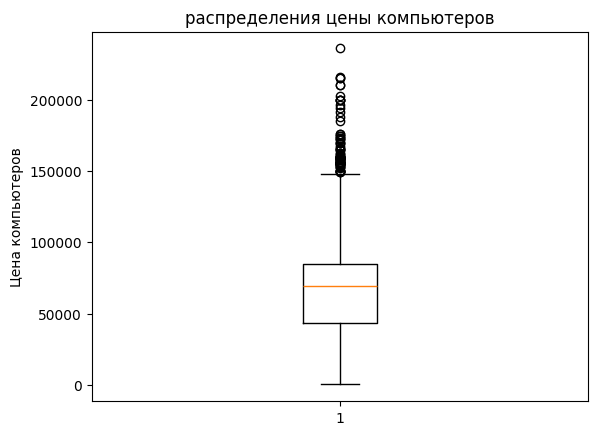

In [80]:
#построим боксплот распределения цены
plt.title('распределения цены компьютеров')
plt.ylabel('Цена компьютеров')
plt.boxplot(price)
plt.show()

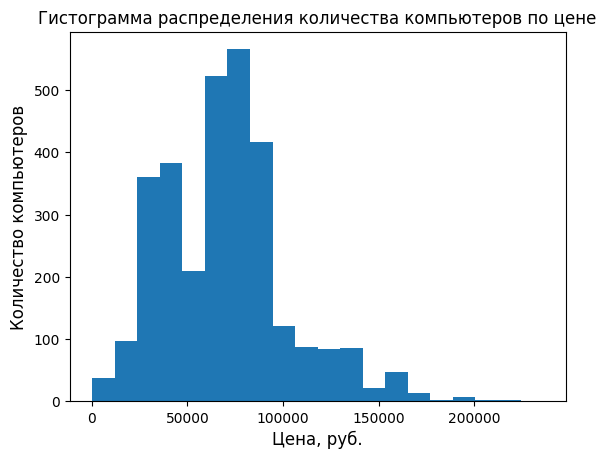

In [81]:
# построим гистаграмму
plt.hist(price,  bins=20)
plt.title('Гистограмма распределения количества компьютеров по цене')
plt.ylabel('Количество компьютеров', fontsize=12)
plt.xlabel('Цена, руб.', fontsize=12) # подпись по оси х
plt.show()


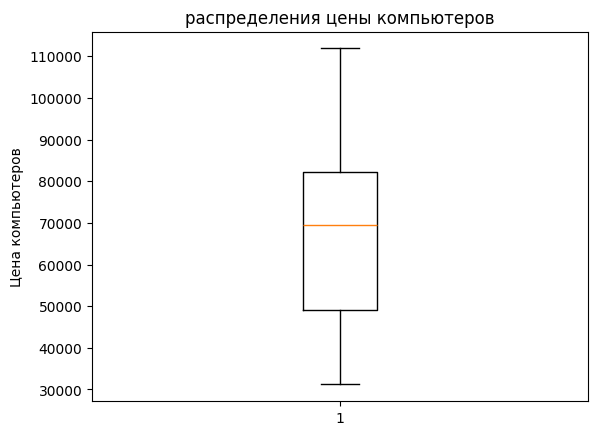

In [82]:
# Ограничим графический анализ 10 процентилем снизу и 90 процентилем сверху, тем самым обработав часть выбросов, и заново построим "ящик с усами"
price2 = df_copy[
    (df_copy['Цена товара (руб)']>=percentile_10_value)&
    (df_copy['Цена товара (руб)']<=percentile_90_value)]['Цена товара (руб)']
plt.title('распределения цены компьютеров')
plt.ylabel('Цена компьютеров')
plt.boxplot(price2)
plt.show()

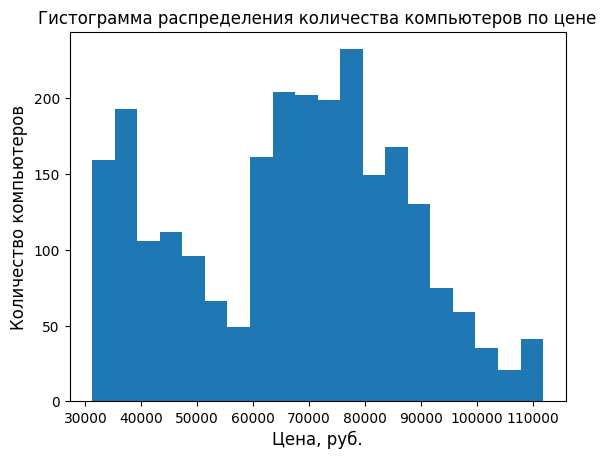

In [83]:
# построим столбчатую диаграмму с учетом ограничения по процентилям:
plt.hist(price2, bins=20)
plt.title('Гистограмма распределения количества компьютеров по цене')
plt.ylabel('Количество компьютеров', fontsize=12)
plt.xlabel('Цена, руб.', fontsize=12)
plt.show()

**Выводы:**
1. Наибольшая цена компьютеров из интернет магазина - 235900.00,
наименьшая цена: 254, что противоречит здравому смыслу. При рассмотрении указанной записи сделать однозначный вывод не возможно, так как это не является не компютером (мышка, провод и т.п.) возможно произошла ошибка при вводе данных.  
2. 10-й процентиль цены составляет -   31198.8, то есть 10 и менее % компьютеров стоят до 31 199 рублей.
3. Разброс цены достаточно большой. Средняя цена составляет 69 589.50, при этом медиана цены - 69 433.00. Цена в 90% рассматриваемых товаров не превышает 111 880.0 Выбросы на графике расположены кучно.
4. По размерам столбцов гистограммы  также виден разброс данных.

# 4.1.2 Количество ядер процессора

In [84]:
df_copy.head()

,product_id,Наименование товара,Цена товара (руб),Количество продаж,Видеопроцессор,Операционная система,Процессор_тип,Количество ядер процессора,Тип оперативной памяти,Объем оперативной памяти (Гб),Объем накопителя HDD (Гб),Объем накопителя SSD (Гб)
0,17880420,компьютер hp prodesk 400 g6 mt,35720,NaN,не заполнено,отсутствует,не заполнено,не заполнено,не заполнено,16,NaN,512
1,19347937,офисный компьютер robotcomp казначей v1,39237,Купили более 10 раз,Intel UHD Graphics 630,windows пробная,Intel Core i5,6,DDR 4,8,NaN,480
2,19348951,игровой компьютер robotcomp м16 2.0 v1,76188,Купили более 200 раз,NVIDIA GeForce GTX 1660,windows пробная,Intel Core i5,6,DDR 4,16,NaN,960
3,19355097,игровой компьютер robotcomp m-16 v1,55625,Купили более 40 раз,NVIDIA GeForce GTX 1650,windows пробная,Intel Core i5,6,DDR 4,16,NaN,480
4,19358744,игровой компьютер robotcomp анаконда 2.0 v1,128284,Купили более 5 раз,NVIDIA GeForce RTX 3070,windows пробная,Intel Core i5,10,DDR 4,16,NaN,960


In [85]:
# посмотрим на значения признака, количество ядер процессора, это числовой признак
df_copy['Количество ядер процессора'].unique()

array(['не заполнено', '6', '10', '4', '2', '12', '16', '8', '2 ядра',
       '8 Ядер 16 потоков', '4 ядра', '6 ядер', '14', '20'], dtype=object)

In [86]:
df_copy['Количество ядер процессора'] = df_copy['Количество ядер процессора'].str.replace("ядер|ядра", '', regex=True).str.strip()

In [87]:
df_copy['Количество ядер процессора'].unique()

array(['не заполнено', '6', '10', '4', '2', '12', '16', '8',
       '8 Ядер 16 потоков', '14', '20'], dtype=object)

In [88]:
df_copy ['Количество ядер процессора'] = df_copy['Количество ядер процессора'].str.extract(r"(\d+)")

In [89]:
df_copy['Количество ядер процессора'].unique()

array([nan, '6', '10', '4', '2', '12', '16', '8', '14', '20'],
      dtype=object)

In [90]:
# Преобразуем колонку 'Количество ядер процессора' в числовой тип
df_copy['Количество ядер процессора'] = df_copy['Количество ядер процессора'].astype(float)
# сохраним данные по колонке в отдельную переменную
amound_count_proces = df_copy['Количество ядер процессора']

In [91]:
# посмотрим описательную статистику признака
amound_count_proces.describe()

,Количество ядер процессора
count,2826.000000
mean,6.583864
std,2.922517
min,2.000000
25%,6.000000
50%,6.000000
75%,8.000000
max,20.000000


In [92]:
# Рассчитаем максимальное и минимальное значения признака
max_count_proces = amound_count_proces.max()
min_count_proces = amound_count_proces.min()
print('Наибольшее количество ядер процессора: ', max_count_proces, 'Наименьшее количество ядер процессора: ', min_count_proces)

Наибольшее количество ядер процессора:  20.0 Наименьшее количество ядер процессора:  2.0


In [93]:
# среднее значение признака
mean_count_proces = amound_count_proces.mean()
print('Среднее количество ядер процессора: ', mean_count_proces)

Среднее количество ядер процессора:  6.583864118895966


In [94]:
# медианное значение признака
median_count_proces = amound_count_proces.median()
print('Медиана количества ядер процессора: ', median_count_proces)

Медиана количества ядер процессора:  6.0


In [95]:
# Рассчитаем процентили (10, 25, 50, 75, 90)
percentile_10_count_proces = amound_count_proces.quantile(0.10)
percentile_25_count_proces = amound_count_proces.quantile(0.25)
percentile_50_count_proces = amound_count_proces.quantile(0.50)
percentile_75_count_proces = amound_count_proces.quantile(0.75)
percentile_90_count_proces = amound_count_proces.quantile(0.90)
print('10-й процентиль количества ядер процессора: ', percentile_10_count_proces)
print('25-й процентиль количества ядер процессора: ', percentile_25_count_proces)
print('50-й процентиль количества ядер процессора: ', percentile_50_count_proces)
print('75-й процентиль количества ядер процессора: ', percentile_75_count_proces)
print('90-й процентиль количества ядер процессора: ', percentile_90_count_proces)

10-й процентиль количества ядер процессора:  4.0
25-й процентиль количества ядер процессора:  6.0
50-й процентиль количества ядер процессора:  6.0
75-й процентиль количества ядер процессора:  8.0
90-й процентиль количества ядер процессора:  12.0


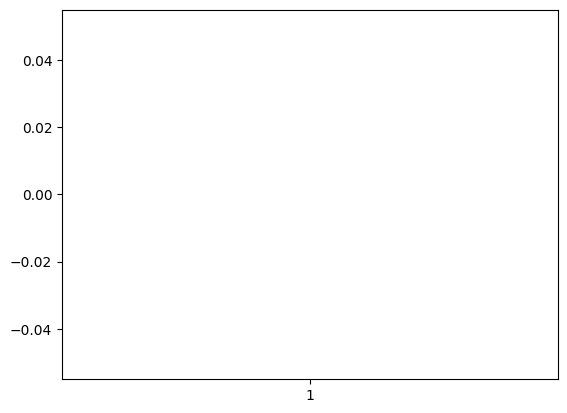

In [96]:
# построим ящик с усами
plt.boxplot(amound_count_proces)
plt.show()

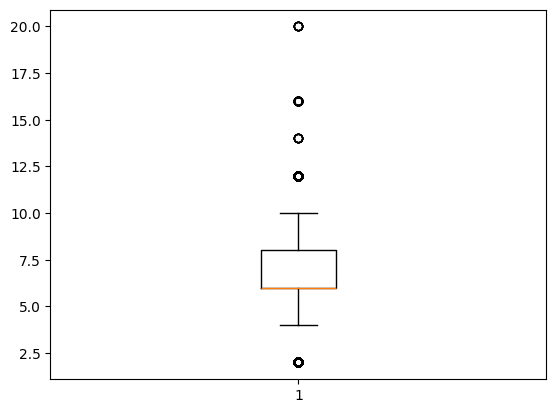

In [97]:
# Диаграмма пустая, значит имеются пропущенные значения по признаку.
# Очистиv клонку от пустых значений с помощью dropna
amound_count_proces_without_na = amound_count_proces.dropna()
plt.boxplot(amound_count_proces_without_na)
plt.show()

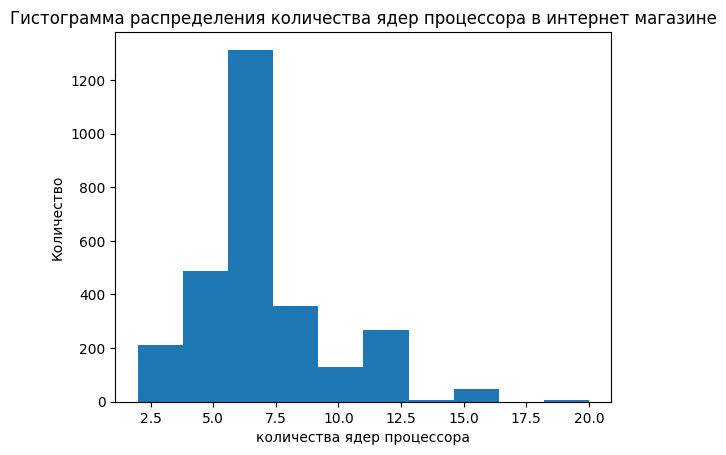

In [98]:
# построим гистограмму, чтобы посмотреть на распределение признака.
plt.hist(amound_count_proces_without_na)
plt.title('Гистограмма распределения количества ядер процессора в интернет магазине')
plt.xlabel('количества ядер процессора')
plt.ylabel('Количество')
plt.show()

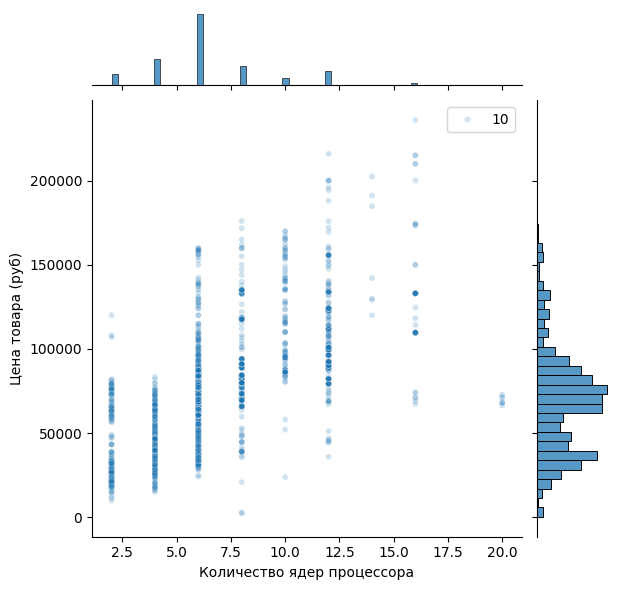

In [99]:
# Построим диаграмму совместного распределения двух количественных переменных - Количетво ядер процессора-цена
# передав параметры size и alpha для улучшения визуализации
sns.jointplot(x=df_copy['Количество ядер процессора'], y=df_copy['Цена товара (руб)'],size=10, alpha=0.2)
plt.show()

Выводы:

Максимальное значение признака Количество ядер процессора составляет 20 Минимальное значение признака Количество ядер процессора - 2, размах значений большой.
Среднее количество ядер процессора в продаваемых компьютерах составляет 6,58, при этом медиана составляет 6.
10-й процентиль (4): Это значение означает, что 10% компьютеров имеют количество ядер меньше 4. 25-й процентиль (6) и 50-й процентиль (6): означает, что и 50% компьютеров имеют количество ядер меньше 6. 75-й процентиль (8) означает, что 75% компьютеров имеют количество ядер меньше 8. 90-й процентиль (12): означает, что 90% компьютеров имеют количество ядер меньше 12. Диаграмма boxplot указывает, что медиана и 25 процентель совпадают, и составляют 6. По гистограмме можно увидеть, что наибольшее количество компьютеров имеет количество ядер от 5,5 до 6,5. При анализе взаимосвязи количество ядер процессора и Цены компьютеров можно увидеть, что с увеличением количества ядер минимальная и максимальная цена компьютеров возрастает, что свидетельствует о зависимости количества ядер и Цены компьютера

# 4.1.3 Объем оперативной памяти

In [100]:
# посмотрим на общую информацию о датасете
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     3069 non-null   int64  
 1   Наименование товара            3069 non-null   object 
 2   Цена товара (руб)              3069 non-null   int64  
 3   Количество продаж              768 non-null    object 
 4   Видеопроцессор                 3069 non-null   object 
 5   Операционная система           3069 non-null   object 
 6   Процессор_тип                  3069 non-null   object 
 7   Количество ядер процессора     2826 non-null   float64
 8   Тип оперативной памяти         3069 non-null   object 
 9   Объем оперативной памяти (Гб)  2718 non-null   Int64  
 10  Объем накопителя HDD (Гб)      861 non-null    float64
 11  Объем накопителя SSD (Гб)      2822 non-null   Int64  
dtypes: Int64(2), float64(2), int64(2), object(6)
mem

In [101]:
# объем оперативной памяти, это числовой признак
# сохраним данные по колонке в отдельную переменную
amound_ram = df_copy['Объем оперативной памяти (Гб)']

In [102]:
# Рассчитаем максимальное и минимальное значения объема
max_value_ram = amound_ram.max()
min_value_ram = amound_ram.min()
print('Наибольший объем памяти: ', max_value_ram, 'Наименьший объем памяти: ', min_value_ram)

Наибольший объем памяти:  64 Наименьший объем памяти:  2


In [103]:
# среднее значение признака
mean_value_ram = amound_ram.mean()
print('Средний объем памяти: ', mean_value_ram)

Средний объем памяти:  19.751287711552614


In [104]:
# медианное значение признака
median_value_ram = amound_ram.median()
print('Медиана оъема памяти: ', median_value_ram)

Медиана оъема памяти:  16.0


In [105]:
# Рассчитаем процентили (10, 25, 50, 75, 90)
percentile_10_value_ram = amound_ram.quantile(0.10)
percentile_25_value_ram = amound_ram.quantile(0.25)
percentile_50_value_ram = amound_ram.quantile(0.50)
percentile_75_value_ram = amound_ram.quantile(0.75)
percentile_90_value_ram = amound_ram.quantile(0.90)
print('10-й процентиль объема памяти: ', percentile_10_value_ram)
print('25-й процентиль объема памяти: ', percentile_25_value_ram)
print('50-й процентиль объема памяти: ', percentile_50_value_ram)
print('75-й процентиль объема памяти: ', percentile_75_value_ram)
print('90-й процентиль объема памяти: ', percentile_90_value_ram)

10-й процентиль объема памяти:  8
25-й процентиль объема памяти:  16
50-й процентиль объема памяти:  16
75-й процентиль объема памяти:  32
90-й процентиль объема памяти:  32


In [106]:
# посмотрим описательную статистику признака
amound_ram.describe()

,Объем оперативной памяти (Гб)
count,2718.0
mean,19.751288
std,10.496821
min,2.0
25%,16.0
50%,16.0
75%,32.0
max,64.0


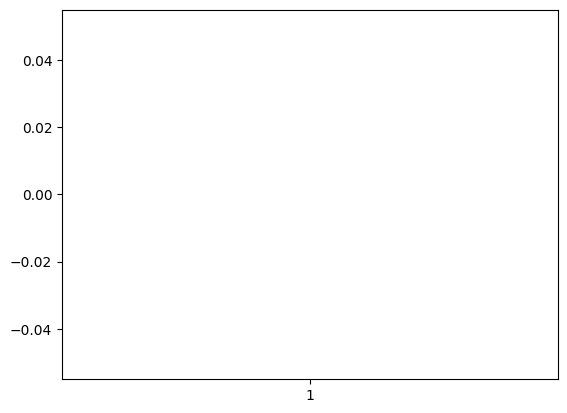

In [107]:
# построим ящик с усами
plt.boxplot(amound_ram)
plt.show()

In [108]:
# Диаграмма пустая, значит имеются пропущенные значения по признаку.
# Очистиv клонку от пустых значений с помощью dropna
amound_ram_without_na = amound_ram.dropna()

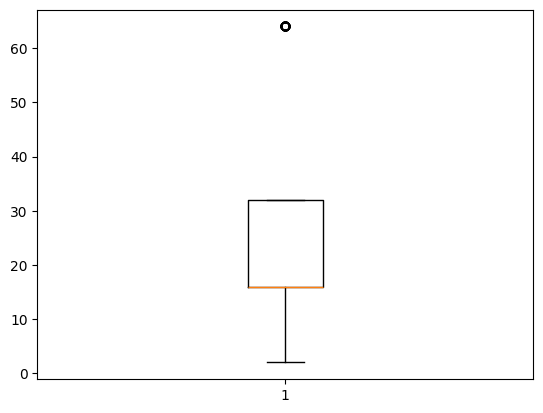

In [109]:
plt.boxplot(amound_ram_without_na)
plt.show()

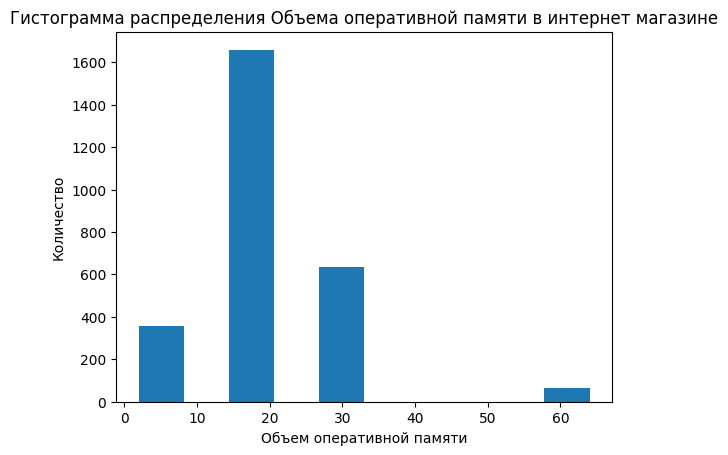

In [110]:
# Попробуем построить гистограмму, чтобы посмотреть на распределение признака.
plt.hist(amound_ram_without_na)
plt.title('Гистограмма распределения Объема оперативной памяти в интернет магазине')
plt.xlabel('Объем оперативной памяти')
plt.ylabel('Количество')
plt.show()

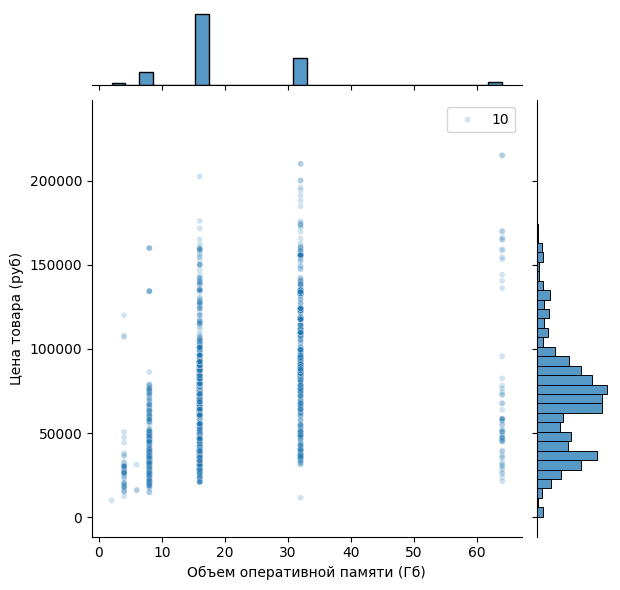

In [111]:
# Построим диаграмму совместного распределения двух количественных переменных - Объем оперативной памяти, цена с помощью функции jointplot(),
# передав параметры size и alpha для улучшения визуализации
sns.jointplot(x=df_copy['Объем оперативной памяти (Гб)'], y=df_copy['Цена товара (руб)'],size=10, alpha=0.2)
plt.show()

Выводы:

Максимальное значение признака Объем оперативной памяти составляет 64 Минимальное значение признака Объем оперативной памяти- 2, размах значений не слишком большой.
Средний Объем оперативной памяти в продаваемых компьютерах составляет 19,7, при этом медиана составляет 16.
10-й процентиль (8): Это значение означает, что 10% компьютеров имеют оперативную память меньше 8.
25-й процентиль (16) и 50-й процентиль (16): означает, что и 50% компьютеров имеют оперативную память меньше 16.
75-й процентиль (32) и 90-й процентиль (32): означает, что 90% компьютеров имеют оперативную память меньше 32.
Диаграмма boxplot указывает, что медиана и 25 процентель совпадают, и составляют 16. По гистограмме можно увидеть, что наибольшее количество компьютеров имеет объем оперативной памяти от 16 до 32.
При анализе взаимосвязи Объема оперативной памяти и Цены компьютеров можно увидеть, что с увеличением объема памяти миниматьная и максимальная цена компьютеров возрастает, что может свидетельствовать о зависимости Объема оперативной памяти и Цены компьютера

# 4.1.4 Объем накопителя HDD (Гб)

In [112]:
# объем оперативной памяти, это числовой признак
# сохраним данные по колонке в отдельную переменную
amound_hdd = df_copy['Объем накопителя HDD (Гб)']

In [113]:
# Рассчитаем максимальное и минимальное значения объема накопителя HDD
max_value_hdd = amound_hdd.max()
min_value_hdd = amound_hdd.min()
print('Наибольший объем накопителя HDD: ',max_value_hdd, 'Наименьший объем накопителя HDD: ', min_value_hdd)

Наибольший объем накопителя HDD:  4000.0 Наименьший объем накопителя HDD:  250.0


In [114]:
# среднее значение признака
mean_value_hdd = amound_hdd.mean()
print('Средний объем накопителя HDD: ', mean_value_hdd)

Средний объем накопителя HDD:  1018.0209059233449


In [115]:
# медианное значение признака
median_value_hdd = amound_hdd.median()
print('Медиана оъема накопителя HDD: ', median_value_hdd)

Медиана оъема накопителя HDD:  1000.0


In [116]:
# Рассчитаем процентили (10, 25, 50, 75, 90)
percentile_10_value_hdd = amound_hdd.quantile(0.10)
percentile_25_value_hdd = amound_hdd.quantile(0.25)
percentile_50_value_hdd = amound_hdd.quantile(0.50)
percentile_75_value_hdd = amound_hdd.quantile(0.75)
percentile_90_value_hdd = amound_hdd.quantile(0.90)
print('10-й процентиль объема памяти: ', percentile_10_value_hdd)
print('25-й процентиль объема памяти: ', percentile_25_value_hdd)
print('50-й процентиль объема памяти: ', percentile_50_value_hdd)
print('75-й процентиль объема памяти: ', percentile_75_value_hdd)
print('90-й процентиль объема памяти: ', percentile_90_value_hdd)

10-й процентиль объема памяти:  1000.0
25-й процентиль объема памяти:  1000.0
50-й процентиль объема памяти:  1000.0
75-й процентиль объема памяти:  1000.0
90-й процентиль объема памяти:  1024.0


In [117]:
# посмотрим описательную статистику признака
amound_hdd.describe()

,Объем накопителя HDD (Гб)
count,861.000000
mean,1018.020906
std,249.303503
min,250.000000
25%,1000.000000
50%,1000.000000
75%,1000.000000
max,4000.000000


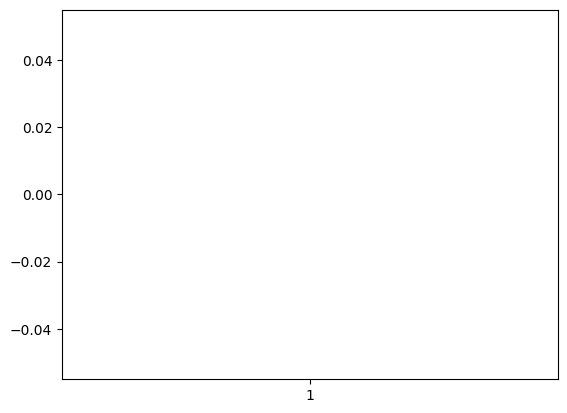

In [118]:
# построим ящик с усами
plt.boxplot(amound_hdd)
plt.show()

In [119]:
# Диаграмма пустая, значит имеются пропущенные значения по признаку.
# Очистим клонку от пустых значений с помощью dropna
amound_hdd_without_na = amound_hdd.dropna()

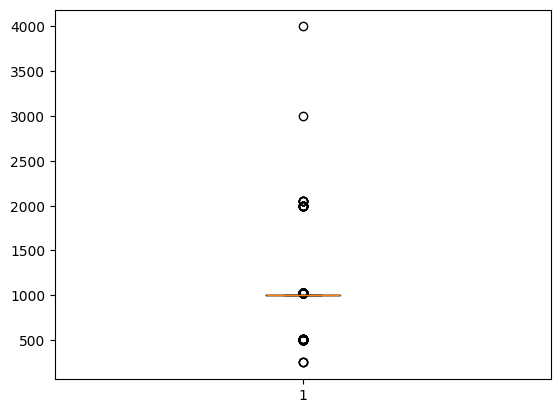

In [120]:
plt.boxplot(amound_hdd_without_na)
plt.show()

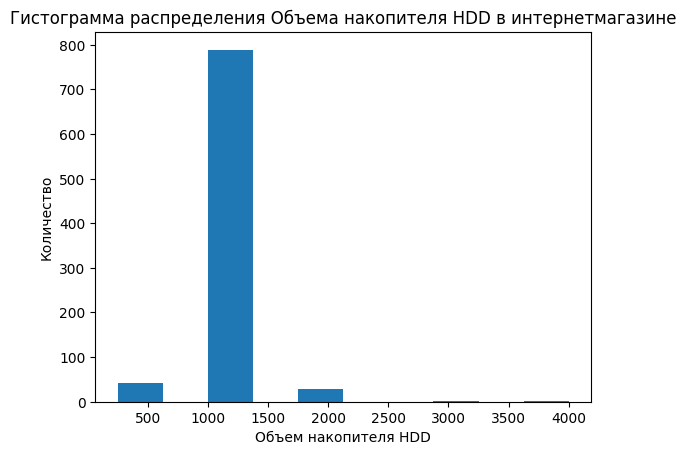

In [121]:
# так как все квартили при расчете равны друг другу, боксплот не информативен.
# попробуем построить гистограмму
plt.hist(amound_hdd_without_na)
plt.title('Гистограмма распределения Объема накопителя HDD в интернетмагазине')
plt.xlabel('Объем накопителя HDD')
plt.ylabel('Количество')
plt.show()


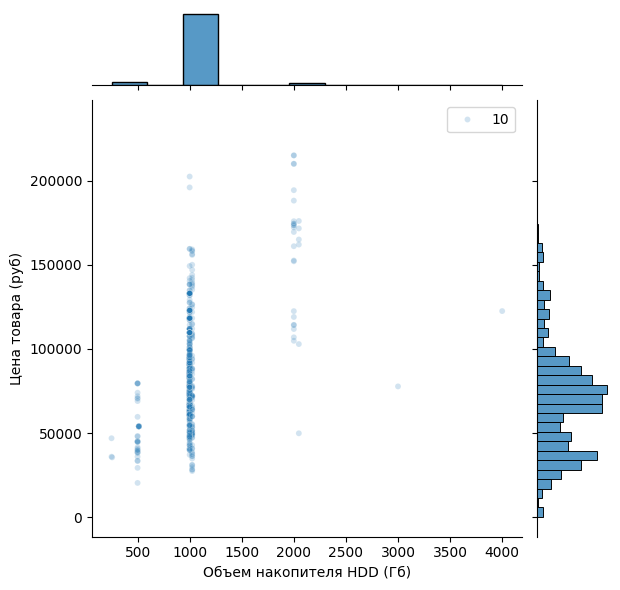

In [122]:
# Построим диаграмму совместного распределения двух количественных переменных - Объем накопителя HDD, цена с помощью функции jointplot(),
# передав параметры size и alpha для улучшения визуализации
sns.jointplot(x=df_copy['Объем накопителя HDD (Гб)'], y=df_copy['Цена товара (руб)'],size=10, alpha=0.2)
plt.show()


Выводы:

Максимальное значение признака Объем накопителя SDD составляет 2048 Минимальное значение признака Объем накопителя SDD - 16, размах значений достаточно большой.
Средний Объем оперативной памяти в продаваемых компьютерах составляет 625, при этом медиана составляет 480.
10-й процентиль объема памяти: 240 25-й процентиль объема памяти: 480 50-й процентиль объема памяти: 480 75-й процентиль объема памяти: 1000 90-й процентиль объема памяти: 1000
10-й процентиль (240): Это значение означает, что 10% компьютеров имеют Объем накопителя SDD меньше 240.
25-й процентиль (480) и 50-й процентиль (480): означают, что 50% компьютеров имеют Объем накопителя SDD меньше 480.
75-й процентиль (1000) и 90-й процентиль (1000): означают, что 90% компьютеров имеют Объем накопителя SDD меньше 1000.
Диаграмма boxplot указывает, что медиана и 25 процентель совпадают, и составляют 480. По гистограмме можно увидеть, что наибольшее количество компьютеров имеет Объем накопителя SDD от 16 до 32.
При анализе взаимосвязи Объем накопителя SDD и Цены компьютеров можно увидеть, что с увеличением объема накопителя SDD минимальная и максимальная цена компьютеров возрастает, что свидетельствует о зависимости объема накопителя SDD и Цены компьютера

# 4.1.5. Объем накопителя SSD (Гб)

In [123]:
# объем накопителя SDD, это числовой признак
# сохраним данные по колонке в отдельную переменную
amound_sdd = df_copy['Объем накопителя SSD (Гб)']

In [124]:
# Рассчитаем максимальное и минимальное значения объема
max_value_sdd = amound_sdd.max()
min_value_sdd = amound_sdd.min()
print('Наибольший объем накопителя SSD: ', max_value_sdd, 'Наименьший объем накопителя SSD: ', min_value_sdd)

Наибольший объем накопителя SSD:  2048 Наименьший объем накопителя SSD:  16


In [125]:
# среднее значение признака
mean_value_sdd = amound_sdd.mean()
print('Средний объем накопителя SSD: ', mean_value_sdd)

Средний объем накопителя SSD:  625.9603118355776


In [126]:
# медианное значение признака
median_value_sdd = amound_sdd.median()
print('Медиана оъема накопителя SSD: ', median_value_sdd)


Медиана оъема накопителя SSD:  480.0


In [127]:
# Рассчитаем процентили (10, 25, 50, 75, 90)
percentile_10_value_sdd = amound_sdd.quantile(0.10)
percentile_25_value_sdd = amound_sdd.quantile(0.25)
percentile_50_value_sdd = amound_sdd.quantile(0.50)
percentile_75_value_sdd = amound_sdd.quantile(0.75)
percentile_90_value_sdd = amound_sdd.quantile(0.90)
print('10-й процентиль объема памяти: ', percentile_10_value_sdd)
print('25-й процентиль объема памяти: ', percentile_25_value_sdd)
print('50-й процентиль объема памяти: ', percentile_50_value_sdd)
print('75-й процентиль объема памяти: ', percentile_75_value_sdd)
print('90-й процентиль объема памяти: ', percentile_90_value_sdd)


10-й процентиль объема памяти:  240
25-й процентиль объема памяти:  480
50-й процентиль объема памяти:  480
75-й процентиль объема памяти:  1000
90-й процентиль объема памяти:  1000


In [128]:
# посмотрим описательную статистику признака
amound_sdd.describe()

,Объем накопителя SSD (Гб)
count,2822.0
mean,625.960312
std,340.637771
min,16.0
25%,480.0
50%,480.0
75%,1000.0
max,2048.0


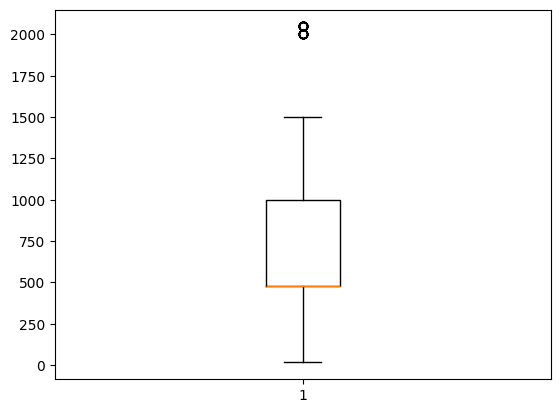

In [129]:
# Очистиv клонку от пустых значений с помощью dropna
amound_sdd_without_na = amound_sdd.dropna()

# построим ящик с усами
plt.boxplot(amound_sdd_without_na)
plt.show()


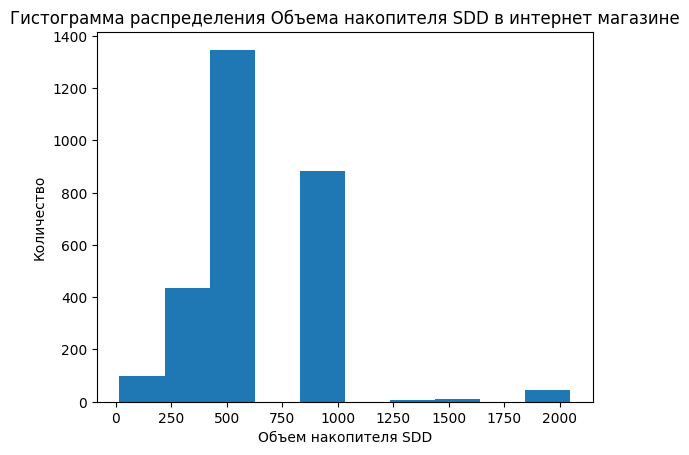

In [130]:
# построим гистограмму, чтобы посмотреть на распределение признака.
plt.hist(amound_sdd_without_na)
plt.title('Гистограмма распределения Объема накопителя SDD в интернет магазине')
plt.xlabel('Объем накопителя SDD')
plt.ylabel('Количество')
plt.show()

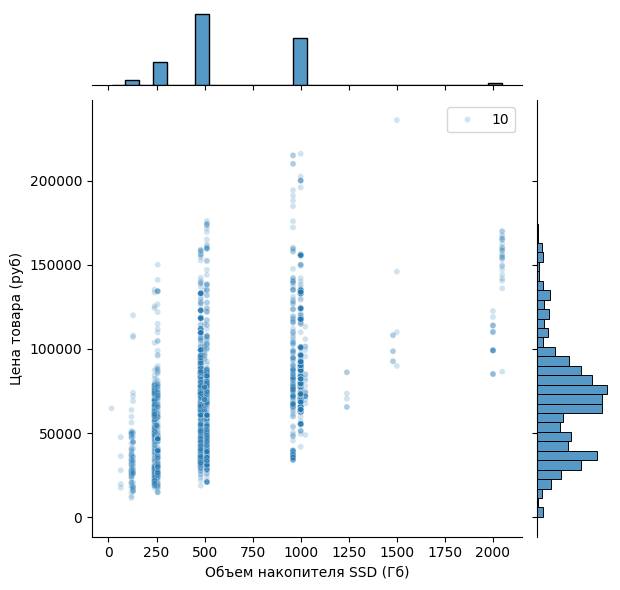

In [131]:
# Построим диаграмму совместного распределения двух количественных переменных - Объем накопителя SDD, и цена компьютера с помощью функции jointplot(),
# передав параметры size и alpha для улучшения визуализации
sns.jointplot(x=df_copy['Объем накопителя SSD (Гб)'], y=df_copy['Цена товара (руб)'],size=10, alpha=0.2)
plt.show()

Выводы:

Максимальное значение признака Объем накопителя SDD составляет 2048 Минимальное значение признака Объем накопителя SDD - 16, размах значений достаточно большой.
Средний Объем оперативной памяти в продаваемых компьютерах составляет 625, при этом медиана составляет 480.
10-й процентиль объема памяти: 240 25-й процентиль объема памяти: 480 50-й процентиль объема памяти: 480 75-й процентиль объема памяти: 1000 90-й процентиль объема памяти: 1000
10-й процентиль (240): Это значение означает, что 10% компьютеров имеют Объем накопителя SDD меньше 240.
25-й процентиль (480) и 50-й процентиль (480): означают, что 50% компьютеров имеют Объем накопителя SDD меньше 480.
75-й процентиль (1000) и 90-й процентиль (1000): означают, что 90% компьютеров имеют Объем накопителя SDD меньше 1000.
Диаграмма boxplot указывает, что медиана и 25 процентель совпадают, и составляют 480. По гистограмме можно увидеть, что наибольшее количество компьютеров имеет Объем накопителя SDD от 16 до 32.
При анализе взаимосвязи Объем накопителя SDD и Цены компьютеров можно увидеть, что с увеличением объема накопителя SDD минимальная и максимальная цена компьютеров возрастает, что свидетельствует о зависимости объема накопителя SDD и Цены компьютера

# 4.2. Анализ категориальных признаков

# 4.2.1 Видеопроцессор

In [132]:
# Оценим описательные статистики признака с помощью метода describe()
df_copy['Видеопроцессор'].describe()

,Видеопроцессор
count,3069
unique,76
top,NVIDIA GeForce RTX 3060
freq,553


In [133]:
# Посмотрим  на уникальные значения признака
df_copy['Видеопроцессор'].unique()

array(['не заполнено', 'Intel UHD Graphics 630',
       'NVIDIA GeForce GTX 1660', 'NVIDIA GeForce GTX 1650',
       'NVIDIA GeForce RTX 3070', 'NVIDIA GeForce RTX 3050',
       'AMD Radeon Vega 7', 'NVIDIA GeForce RTX 3080',
       'AMD Radeon Vega 3', 'NVIDIA GeForce RTX 3060',
       'NVIDIA GeForce GT 1030', 'intel UHD Graphics 750',
       'Intel HD Graphics 6000', 'Intel HD Graphics 610',
       'NVIDIA GeForce GT 730', 'AMD Radeon Vega 8',
       'Intel HD Graphics 630', 'NVIDIA GeForce GTX 1050',
       'NVIDIA Quadro T400', 'NVIDIA GeForce GT 740', 'Intel HD Graphics',
       'Intel HD Graphics 530', 'NVIDIA GeForce RTX 2060',
       'AMD Radeon RX 580', 'Intel HD Graphics 600', 'AMD Radeon R5',
       'Intel UHD Graphics 610', 'NVIDIA', 'NVIDIA GeForce GTX 1630',
       'NVIDIA GeForce GT 610', 'AMD Radeon RX 550', 'AMD Radeon RX 6500',
       'Intel HD Graphics 2000', 'Intel HD Graphics 4000', 'AMD',
       'Без видеокарты', 'Intel Core i5 11400F 2.6ГГц',
       'Intel Core 

In [134]:
df_copy['Видеопроцессор'].values

array(['не заполнено', 'Intel UHD Graphics 630',
       'NVIDIA GeForce GTX 1660', ..., 'NVIDIA', 'Nvidia', 'Nvidia'],
      dtype=object)

In [135]:
# посмотрим на количество уникальных значений
df_copy['Видеопроцессор'].value_counts()

,count
Видеопроцессор,
NVIDIA GeForce RTX 3060,553
NVIDIA GeForce RTX 3050,390
не заполнено,328
NVIDIA GeForce GTX 1650,274
NVIDIA GeForce GTX 1660,245
...,...
AMD,1
Без видеокарты,1
RTX 1650 4GB,1


In [136]:
# Фильтруем данные, исключая записи с названием 'не заполнено'
filtered_video_dataset = df_copy[df_copy['Видеопроцессор'] != 'не заполнено']

# Посмотрим на наиболее часто встречающееся название и процент такого названия в датасете
type_counts = filtered_video_dataset['Видеопроцессор'].value_counts()

# Находим наиболее часто встречающееся название и его количество
most_common_count = type_counts.max()
most_common_name = type_counts.idxmax()

# Общее количество записей в отфильтрованной колонке
total_count = filtered_video_dataset['Видеопроцессор'].count()

# Рассчитываем процент
percentage = (most_common_count / total_count) * 100

# Выводим результат
print(f"Наиболее часто встречающееся название: {most_common_name}")
print(f"Количество: {most_common_count}")
print(f"Процент: {percentage:.2f}%")

Наиболее часто встречающееся название: NVIDIA GeForce RTX 3060
Количество: 553
Процент: 20.18%


In [137]:
# Посмотрим сколько названий Видеопроцессора имеет название 'не заполнено'
not_filled_dataset = df_copy[df_copy['Видеопроцессор'] == 'не заполнено']
filtered_count = not_filled_dataset['Видеопроцессор'].count()
total_count = df_copy['Видеопроцессор'].count()

# Рассчитываем процент
percentage = (filtered_count / total_count) * 100
# Выводим результат
print(f"Количество незаполненных названий: {filtered_count}")
print(f"Процент незаполненных названий: {percentage:.2f}%")

Количество незаполненных названий: 328
Процент незаполненных названий: 10.69%


In [138]:
# посмотрим на топ-10 наиболее часто встречающихся названий
top_10_videoprocessors = filtered_video_dataset['Видеопроцессор'].value_counts().head(10)
top_10_videoprocessors_values = top_10_videoprocessors.sort_values(ascending=True)
print(top_10_videoprocessors_values)

Видеопроцессор
NVIDIA GeForce RTX 3080     69
Intel HD Graphics 530       72
NVIDIA GeForce RTX 2060    113
NVIDIA GeForce GT 1030     143
AMD Radeon Vega 7          182
NVIDIA GeForce RTX 3070    192
NVIDIA GeForce GTX 1660    245
NVIDIA GeForce GTX 1650    274
NVIDIA GeForce RTX 3050    390
NVIDIA GeForce RTX 3060    553
Name: count, dtype: int64


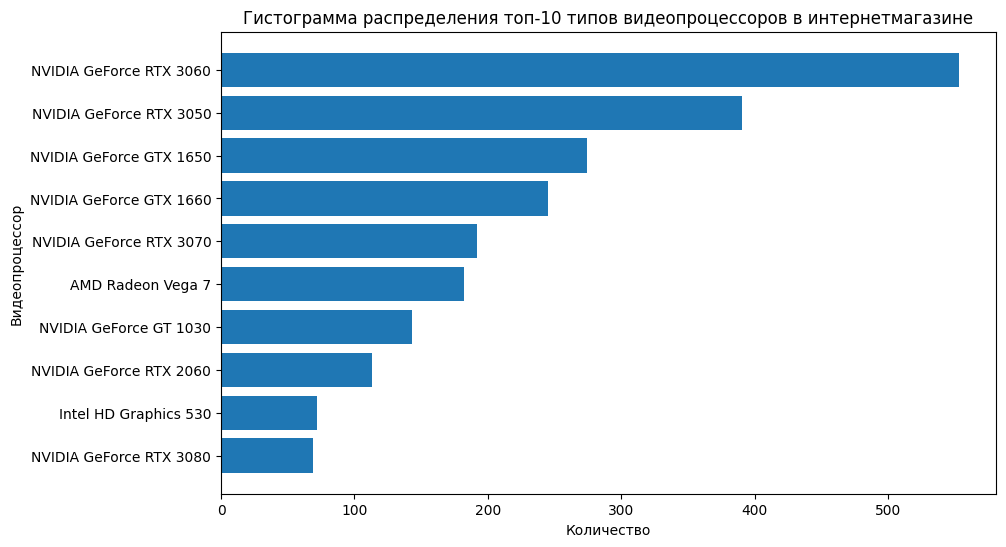

In [139]:
# построим гистограмму распределения видеопроцессоров топ-10
plt.figure(figsize=(10, 6))
plt.barh(top_10_videoprocessors_values.index, top_10_videoprocessors_values.values)
plt.title('Гистограмма распределения топ-10 типов видеопроцессоров в интернетмагазине')
plt.xlabel('Количество')
plt.ylabel('Видеопроцессор')
plt.show()

In [140]:
# Посчитаем количество названий, которые встречаются менее 10 раз
# Фильтруем названия, которые встречаются менее 10 раз
min_10_occurrences = type_counts[type_counts < 10]

# Получаем количество названий, которые встречаются менее 10 раз
count_min_10_occurrences = min_10_occurrences.count()
# Рассчитываем процент
percentage = (count_min_10_occurrences / total_count) * 100

# Выводим результат
print(f"Количество названий видеопроцессоров, которые встречаются менее 10 раз: {count_min_10_occurrences}")
print(f"Процент названий видеопроцессоров, которые встречаются менее 10 раз: {percentage:.2f}%")

Количество названий видеопроцессоров, которые встречаются менее 10 раз: 45
Процент названий видеопроцессоров, которые встречаются менее 10 раз: 1.47%


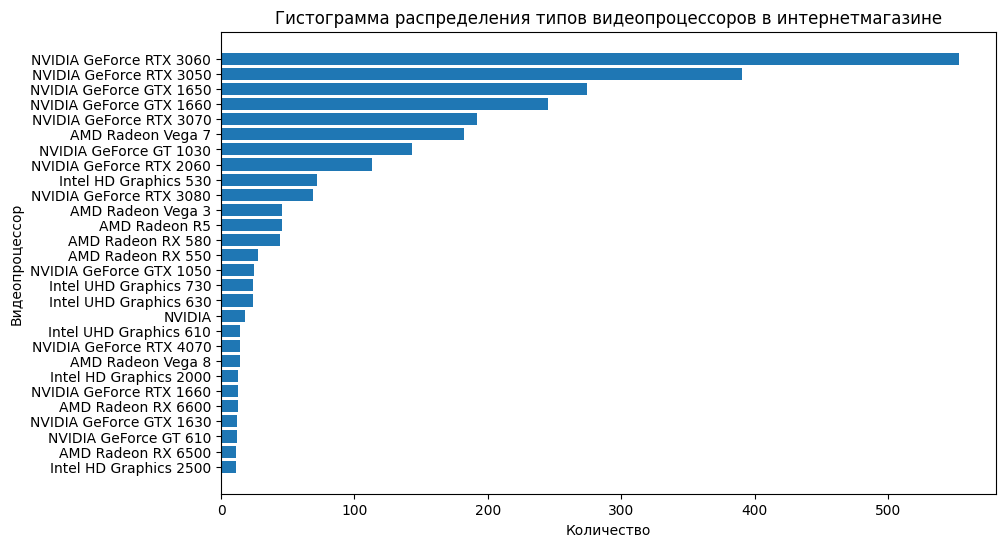

In [141]:

# Фильтруем видеопроцессоры, количество которых больше 10
more_10_counts = type_counts[type_counts > 10]
more_10_counts_values = more_10_counts.sort_values(ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(more_10_counts_values.index, more_10_counts_values.values)
plt.title('Гистограмма распределения типов видеопроцессоров в интернетмагазине')
plt.xlabel('Количество')
plt.ylabel('Видеопроцессор')
plt.show()

Анализ взаимосвязи цены и вида видеопроцессора

In [142]:
name_top_10_videoprocessors = top_10_videoprocessors_values.index


In [143]:
# так как видов Видеопроцессоров очень много, ограничимся анализом топ-10 Видеопроцессоров из датасета
# Оценим медианные значения цены в разрезе видов видеопроцессоров.
top_10_video_filled_dataset = df_copy[df_copy['Видеопроцессор'].isin(name_top_10_videoprocessors)]
top_10_video_filled_dataset.groupby('Видеопроцессор')['Цена товара (руб)'].median()

,Цена товара (руб)
Видеопроцессор,
AMD Radeon Vega 7,36975.0
Intel HD Graphics 530,69360.0
NVIDIA GeForce GT 1030,35476.0
NVIDIA GeForce GTX 1650,61650.5
NVIDIA GeForce GTX 1660,66825.0
NVIDIA GeForce RTX 2060,74626.0
NVIDIA GeForce RTX 3050,76280.5
NVIDIA GeForce RTX 3060,88110.0
NVIDIA GeForce RTX 3070,127274.0


In [144]:

# Оценим описательные статистики цены компьютеров в разрезе видов Видеопроцессора
top_10_video_filled_dataset.groupby('Видеопроцессор')['Цена товара (руб)'].describe()

,count,mean,std,min,25%,50%,75%,max
Видеопроцессор,,,,,,,,
AMD Radeon Vega 7,182.0,39736.725275,6931.393270,29354.0,34775.50,36975.0,44913.00,58500.0
Intel HD Graphics 530,72.0,69518.333333,7359.832553,56590.0,63177.50,69360.0,76352.50,82130.0
NVIDIA GeForce GT 1030,143.0,37214.531469,8422.458858,25500.0,33375.00,35476.0,37616.00,87566.0
NVIDIA GeForce GTX 1650,274.0,59988.748175,10501.929601,34900.0,52372.25,61650.5,65903.00,87112.0
NVIDIA GeForce GTX 1660,245.0,67178.689796,8572.002678,43000.0,62625.00,66825.0,70400.00,88144.0
NVIDIA GeForce RTX 2060,113.0,74971.442478,7197.075497,59674.0,71007.00,74626.0,77571.00,90153.0
NVIDIA GeForce RTX 3050,390.0,78528.892308,9506.406088,61311.0,72806.00,76280.5,84137.25,120000.0
NVIDIA GeForce RTX 3060,553.0,90855.479204,12222.646353,59900.0,83404.00,88110.0,96300.00,150000.0
NVIDIA GeForce RTX 3070,192.0,127708.333333,14106.583675,84900.0,118243.00,127274.0,134904.00,195930.0


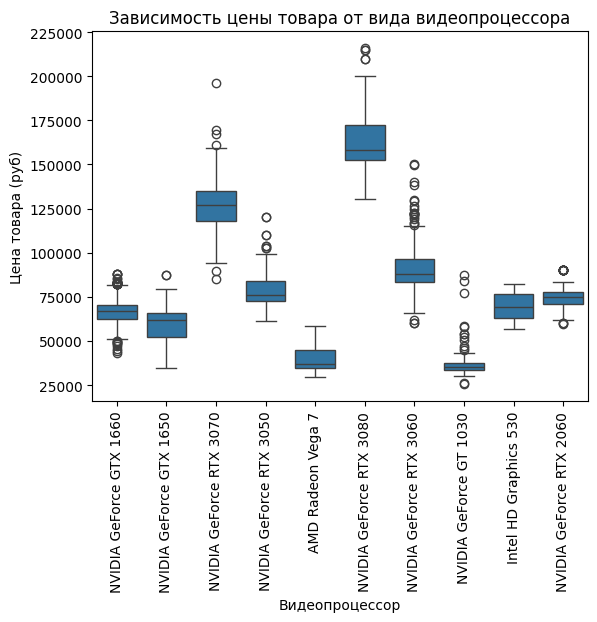

In [145]:
# Построим диаграммы "ящик с усами"  передав в качестве x - виды видеопроцессоров, а в качестве y - цену компьютера
sns.boxplot(x='Видеопроцессор',y='Цена товара (руб)', data=top_10_video_filled_dataset)
plt.xticks(rotation = 90)
plt.title('Зависимость цены товара от вида видеопроцессора')
plt.show()

**Выводы:**
1. В датасете по признаку 'Видеопроцессор' заполнены не все значения, количество незаполненных значений составляет 328, это 10,69 %
2. Количество уникальных значений по признаку видеопроцессор составляет 76.
3.  Самое большаое количество представленных в датасете видеопроцессоров - NVIDIA GeForce RTX 3060. Их количество в датасете - 553, это 20.18% от всех заполненных значений. На втором месте NVIDIA GeForce RTX 3050, их количество 390. Всего в топ-10 видеопроцессоров 8 из 10 позиций представлены различными видеопроцессорами марки NVIDIA GeForce.
6. В датасете встречаются названия Видеопроцессоров, которые повторяются менее 10 раз. Количество таких названий - 45, что составляет 1.47%
7.   В целом медианная цена по наиболее распространненным видам видеопроцессорам существенно отличается, что может свидетельствовать о влияниии вида видеопроцессора на  Цену компьютера.

# 4.2.2. Тип процессора

In [146]:
df_copy['Процессор_тип'].describe()

,Процессор_тип
count,3069
unique,48
top,Intel Core i5
freq,979


In [147]:
df_copy['Процессор_тип'].unique()

array(['не заполнено', 'Intel Core i5', 'Intel Core i3', 'AMD Ryzen 5',
       'AMD Athlon', 'Intel Core i7', 'Intel Core i9', 'AMD Ryzen 3',
       'Gemini Lake Refresh J4115', 'Intel Core 12400F', 'Intel Pentium',
       '6010', 'AMD Ryzen 7', '12400f', 'Intel Xeon',
       'Gemini Lake Refresh J4125', 'AMD A6', '8 ядер', '4 ядра intel',
       'Intel 4 ядра', 'AMD A12-9800E',
       'Intel Apollo Lake J3355 Dual-Core (2 ГГц)', 'AMD E1-6010',
       'AMD RYZEN 4600g Vega7 арт. 100343717', 'Intel', 'Intel Celeron',
       'Intel N5105', 'AMD Ryzen 6',
       'AMD RYZEN 4600g Vega7 арт. 143553804',
       'Intel Atom DualCore D2550 Cedar Trail', 'AMD Ryzen 9',
       'A10-5800KRAM', 'AMD FX-4300', 'AMD FX-6100', 'Intеl Quad Q9400',
       'Intеl Quad 9400', 'Intel E5', 'Intel Core Quad 9400', 'Intel E3',
       'AMD Radeon RX 570', 'Q9400', 'Intеl Quad',
       'intel core i 3 10100f', 'Intel Core i 5 10400f',
       'Intel core 12400F', 'intel core i 5 10400f', 'Apple M1',
       'AMD

In [148]:
df_copy['Процессор_тип'] = df_copy['Процессор_тип'].str.lower()

In [149]:
filter_type_proces_for_drop = (df_copy['Процессор_тип'].str.contains("^не заполнено$|^4 ядра intel$|^8 ядер$|^intel 4 ядра$|^intel$"))
filter_type_proces_for_drop.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3069 entries, 0 to 3068
Series name: Процессор_тип
Non-Null Count  Dtype
--------------  -----
3069 non-null   bool 
dtypes: bool(1)
memory usage: 3.1 KB


In [150]:
filtered_type_proces_df = df_copy[~filter_type_proces_for_drop]

In [151]:
filtered_type_proces_df['Процессор_тип'].value_counts()

,count
Процессор_тип,
intel core i5,979
intel core i7,593
amd ryzen 5,437
intel core i3,335
amd athlon,98
amd ryzen 7,71
amd a6,42
amd ryzen 3,24
intel e5,22


In [152]:
# Так как есть только два уникальных значений amd ryzen 4600g vega7 арт. 100343717
# и amd ryzen 4600g vega7 арт. 143553804, то заменим их вручну.
filtered_type_proces_df.loc[filtered_type_proces_df['Процессор_тип']=='amd ryzen 4600g vega7 арт. 100343717', 'Процессор_тип']='amd ryzen 4600g vega7'
filtered_type_proces_df.loc[filtered_type_proces_df['Процессор_тип']=='amd ryzen 4600g vega7 арт. 143553804', 'Процессор_тип']='amd ryzen 4600g vega7'

In [153]:
filtered_type_proces_df['Процессор_тип'].value_counts()

,count
Процессор_тип,
intel core i5,979
intel core i7,593
amd ryzen 5,437
intel core i3,335
amd athlon,98
amd ryzen 7,71
amd a6,42
amd ryzen 3,24
intel e5,22


In [154]:
filtered_type_proces_df['Процессор_тип'].describe()


,Процессор_тип
count,2738
unique,40
top,intel core i5
freq,979


In [155]:
# Посмотрим на наиболее часто встречающееся название и процент такого названия в датасете
mostly_counts_type_proces = filtered_type_proces_df['Процессор_тип'].value_counts()

# Находим наиболее часто встречающееся название и его количество
most_common_count_type_proces = mostly_counts_type_proces.max()
most_common_name_type_proces = mostly_counts_type_proces.idxmax()

# Общее количество записей в  колонке Операционная система
general_count_type_proces = df_copy['Процессор_тип'].count()
# Общее количество записей в отфильтрованной колонке
filtered_count_type_proces = filtered_type_proces_df['Процессор_тип'].count()

# Рассчитываем процент от указанных значений Процессор_тип
percentage_type_proces = (most_common_count_type_proces / filtered_count_type_proces) * 100

# Рассчитываем процент от всех значений Процессор_тип
percentage_all_type_proces = (most_common_count_type_proces /general_count_type_proces) * 100

# Выводим результат

print(f"Количество заполненных значений Процессор_тип: {filtered_count_type_proces}")
print(f"Наиболее часто встречающееся название: {most_common_name_type_proces}")
print(f"Количество: {most_common_count_type_proces}")
print(f"Процент от указанных значений Процессор_тип: {percentage_type_proces:.2f}%")
print(f"Процент всех значений Процессор_тип: {percentage_all_type_proces:.2f}%")

Количество заполненных значений Процессор_тип: 2738
Наиболее часто встречающееся название: intel core i5
Количество: 979
Процент от указанных значений Процессор_тип: 35.76%
Процент всех значений Процессор_тип: 31.90%


In [156]:
# Посмотрим сколько названий Процессор_тип не заполнено
# считаем количество незаполненных значений
null_count_type_proces = general_count_type_proces - filtered_count_type_proces

# Рассчитываем процент
percentage_null_count_type_proces = (null_count_type_proces / general_count_type_proces) * 100
# Выводим результат
print(f"Количество незаполненных названий: {null_count_type_proces}")
print(f"Процент незаполненных названий: {percentage_null_count_type_proces:.2f}%")

Количество незаполненных названий: 331
Процент незаполненных названий: 10.79%


In [157]:
# посмотрим на топ-10 наиболее часто встречающихся названий Процессор_тип
top_10_type_proces = filtered_type_proces_df['Процессор_тип'].value_counts().head(10)
print(top_10_type_proces)

Процессор_тип
intel core i5    979
intel core i7    593
amd ryzen 5      437
intel core i3    335
amd athlon        98
amd ryzen 7       71
amd a6            42
amd ryzen 3       24
intel e5          22
intel pentium     22
Name: count, dtype: int64


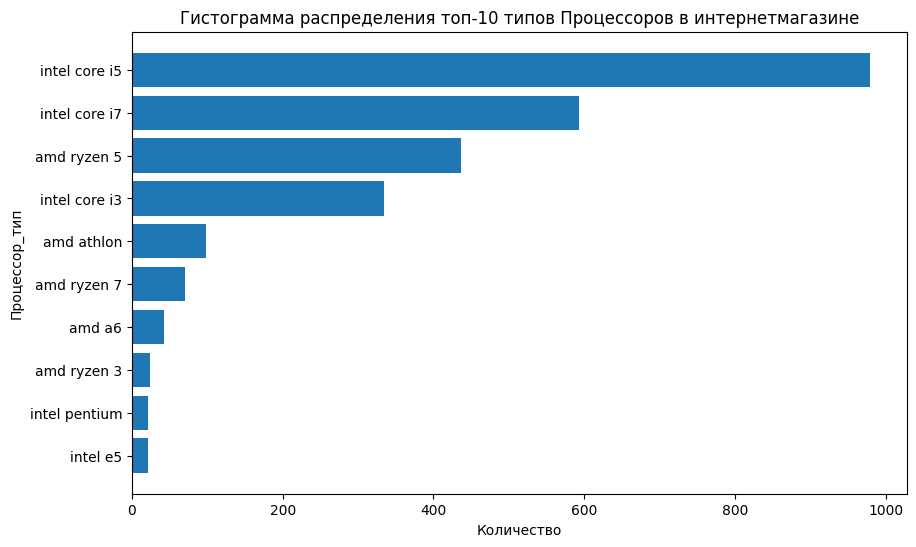

In [158]:
# построим гистограмму распределения Процессор_тип топ-10
sorted_top_10_type_proces = top_10_type_proces.sort_values(ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(sorted_top_10_type_proces.index, sorted_top_10_type_proces.values)
plt.title('Гистограмма распределения топ-10 типов Процессоров в интернетмагазине')
plt.xlabel('Количество')
plt.ylabel('Процессор_тип')
plt.show()

In [159]:
# Оценим медианные значения цены в разрезе топ-10 типов Процессоров.
name_sorted_top_10_type_proces = sorted_top_10_type_proces.index
top_10_type_proces_10_filled_dataset = filtered_type_proces_df[filtered_type_proces_df['Процессор_тип'].isin(name_sorted_top_10_type_proces)]
top_10_type_proces_10_filled_dataset.groupby('Процессор_тип')['Цена товара (руб)'].median()

,Цена товара (руб)
Процессор_тип,
amd a6,21386.0
amd athlon,38186.0
amd ryzen 3,38602.0
amd ryzen 5,62900.0
amd ryzen 7,94080.0
intel core i3,39662.0
intel core i5,74353.0
intel core i7,91882.0
intel e5,68400.0


In [160]:
# Оценим описательные статистики цены компьютеров в разрезе топ-10 типов Процессоров.
top_10_type_proces_10_filled_dataset.groupby('Процессор_тип')['Цена товара (руб)'].describe()

,count,mean,std,min,25%,50%,75%,max
Процессор_тип,,,,,,,,
amd a6,42.0,23035.214286,6324.112465,17572.0,20446.25,21386.0,23733.00,58134.0
amd athlon,98.0,36497.887755,7936.017958,21355.0,29209.00,38186.0,43366.00,48000.0
amd ryzen 3,24.0,37920.625000,8954.302613,24495.0,31706.75,38602.0,44381.75,60904.0
amd ryzen 5,437.0,59733.043478,20738.717836,24193.0,37830.00,62900.0,74872.00,120000.0
amd ryzen 7,71.0,102048.929577,21827.337266,69544.0,90580.00,94080.0,118243.00,175994.0
intel core i3,335.0,45364.214925,16089.361395,14800.0,33778.00,39662.0,56679.00,120000.0
intel core i5,979.0,76544.134831,24844.982995,17607.0,63624.00,74353.0,84510.00,202391.0
intel core i7,593.0,100437.595278,28317.135805,32900.0,79983.00,91882.0,118360.00,235900.0
intel e5,22.0,64272.727273,11495.440994,36000.0,66600.00,68400.0,71260.00,75200.0


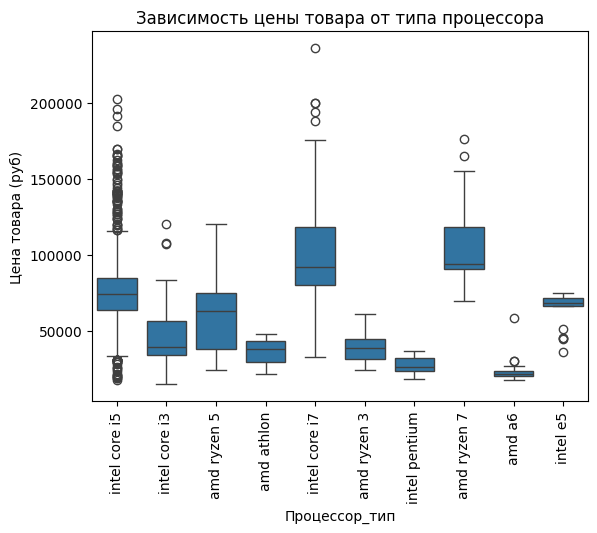

In [161]:
# Построим диаграммы "ящик с усами"  передав в качестве x - топ-10 типов Процессоров, а в качестве y - цену компьютера
sns.boxplot(x='Процессор_тип',y='Цена товара (руб)', data=top_10_type_proces_10_filled_dataset)
plt.xticks(rotation = 90)
plt.title('Зависимость цены товара от типа процессора')
plt.show()

**Выводы:**
1. В датасете по признаку 'Процессор_тип' заполнены не все значения, количество незаполненных значений составляет 331, это 10.79 %
2. Количество уникальных значений по признаку Процессор_тип составляет 40.
3.  Чаще всего на  продаваемых компьютерах в интернет магазине установленн тип процессора - intel core i5. Он встречается в датасете - 979, это 35.76 % от всех заполненных значений. На втором месте intel core i7, его количество 593. Всего в топ-10 по признаку 'Процессор-тип' из 10 позиций 5 представлены типом  intel, остальные 5 - amd.
6. В целом медианная цена по топ-10 типов процессоров существенно отличается, что свидетельствовует о влияниии типа процессора на Цену компьютера.

# 4.2.3. Операционная система

In [162]:
df_copy['Операционная система'].describe()

,Операционная система
count,3069
unique,29
top,Windows 10 Pro
freq,1433


In [163]:
df_copy['Операционная система'].unique()

array(['отсутствует', 'windows пробная', 'Windows 10 Pro',
       'Windows 10 Home', 'Windows 10', 'Free DOS', 'Windows',
       'Windows 11', 'Windows 11 Pro', 'windows 11',
       'Windows 7/8/10, LINUX', 'Windows 10 Home пробная',
       'Windows пробная версия', 'Windows 11 Home', 'windows 10 trial',
       'Windows 10 Pro Trial', 'windows 10', 'Microsoft Windows 11',
       'Window 10 Pro trial', 'DOS', 'windows 10 pro', 'Widows 11 Pro',
       'WINDOWS 10', 'Windows 10 PRO', 'WINDOWS 11', 'macOS',
       'Windows 10 pro Trial', 'Без OC', 'Windows 10 pro'], dtype=object)

In [164]:
# Фильтруем данные, исключая записи с названием 'отсутствует' и 'без ОС'

df_copy['Операционная система'] = df_copy['Операционная система'].str.lower()

In [165]:

filtered_dataset_ram = df_copy[(df_copy['Операционная система'] != 'без oc')]
filtered_dataset_ram = filtered_dataset_ram[(filtered_dataset_ram['Операционная система'] != 'отсутствует')]


In [166]:


# Посмотрим на наиболее часто встречающееся название и процент такого названия в датасете
mostly_counts = filtered_dataset_ram['Операционная система'].value_counts()

# Находим наиболее часто встречающееся название и его количество
most_common_count_ram = mostly_counts.max()
most_common_name_ram = mostly_counts.idxmax()

# Общее количество записей в  колонке Операционная система
general_count_ram = df_copy['Операционная система'].count()
# Общее количество записей в отфильтрованной колонке
filtered_count_ram = filtered_dataset_ram['Операционная система'].count()

# Рассчитываем процент от указанных значений Операционная система
percentage_ram = (most_common_count_ram / filtered_count_ram) * 100

# Рассчитываем процент от всех значений Операционная система
percentage_all_ram = (most_common_count_ram /general_count_ram) * 100

# Выводим результат

print(f"Количество заполненных значений Операционная система: {filtered_count_ram}")
print(f"Наиболее часто встречающееся название: {most_common_name_ram}")
print(f"Количество: {most_common_count_ram}")
print(f"Процент от указанных значений Операционная система: {percentage_ram:.2f}%")
print(f"Процент всех значений Операционная система: {percentage_all_ram:.2f}%")

Количество заполненных значений Операционная система: 2684
Наиболее часто встречающееся название: windows 10 pro
Количество: 1438
Процент от указанных значений Операционная система: 53.58%
Процент всех значений Операционная система: 46.86%


In [167]:
mostly_counts

,count
Операционная система,
windows 10 pro,1438
windows 11 pro,663
windows пробная,219
windows 10,110
windows 10 pro trial,76
windows 10 home,40
free dos,40
windows 11,30
windows,29


In [168]:
# Посмотрим сколько названий Операционная система не заполнено
# считаем количество незаполненных значений
null_count_ram = general_count_ram - filtered_count_ram

# Рассчитываем процент
percentage_null_count = (null_count_ram / general_count_ram) * 100
# Выводим результат
print(f"Количество незаполненных названий: {null_count_ram}")
print(f"Процент незаполненных названий: {percentage_null_count:.2f}%")

Количество незаполненных названий: 385
Процент незаполненных названий: 12.54%


In [169]:
# посмотрим на топ-10 наиболее часто встречающихся названий Операционной системы
top_10_ram = filtered_dataset_ram['Операционная система'].value_counts().head(10)
print(top_10_ram)

Операционная система
windows 10 pro          1438
windows 11 pro           663
windows пробная          219
windows 10               110
windows 10 pro trial      76
windows 10 home           40
free dos                  40
windows 11                30
windows                   29
windows 10 trial          18
Name: count, dtype: int64


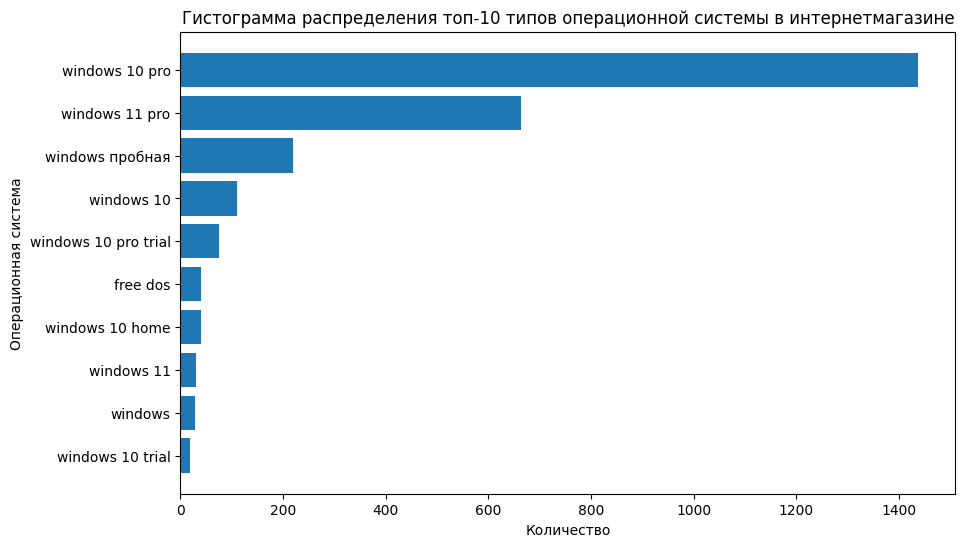

In [170]:
# построим гистограмму распределения операционной памяти топ-10
sorted_top_10_ram = top_10_ram.sort_values(ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(sorted_top_10_ram.index, sorted_top_10_ram.values)
plt.title('Гистограмма распределения топ-10 типов операционной системы в интернетмагазине')
plt.xlabel('Количество')
plt.ylabel('Операционная система')
plt.show()

In [171]:
# Посчитаем количество названий, которые не включают в себя ОС windows
# Фильтруем названия, которые не включают в себя ОС windows

non_windows_ram = filtered_dataset_ram[~filtered_dataset_ram['Операционная система'].str.contains('windows', na=False)]

# Получаем количество названий, которые не содержат в себе ОС windows

count_non_windows_ram = non_windows_ram['Операционная система'].count()
# Рассчитываем процент
percentage_non_windows_ram = (count_non_windows_ram / general_count_ram) * 100
name_count_non_windows_ram = non_windows_ram['Операционная система'].value_counts()


# Выводим результат
print(f"Количество не Windews Операционной системы: {count_non_windows_ram}")
print(f"Процент названий не Windews: {percentage_non_windows_ram:.2f}%")
print(name_count_non_windows_ram)

Количество не Windews Операционной системы: 50
Процент названий не Windews: 1.63%
Операционная система
free dos               40
macos                   7
window 10 pro trial     1
dos                     1
widows 11 pro           1
Name: count, dtype: int64


In [172]:
name_count_non_windows_ram

,count
Операционная система,
free dos,40
macos,7
window 10 pro trial,1
dos,1
widows 11 pro,1


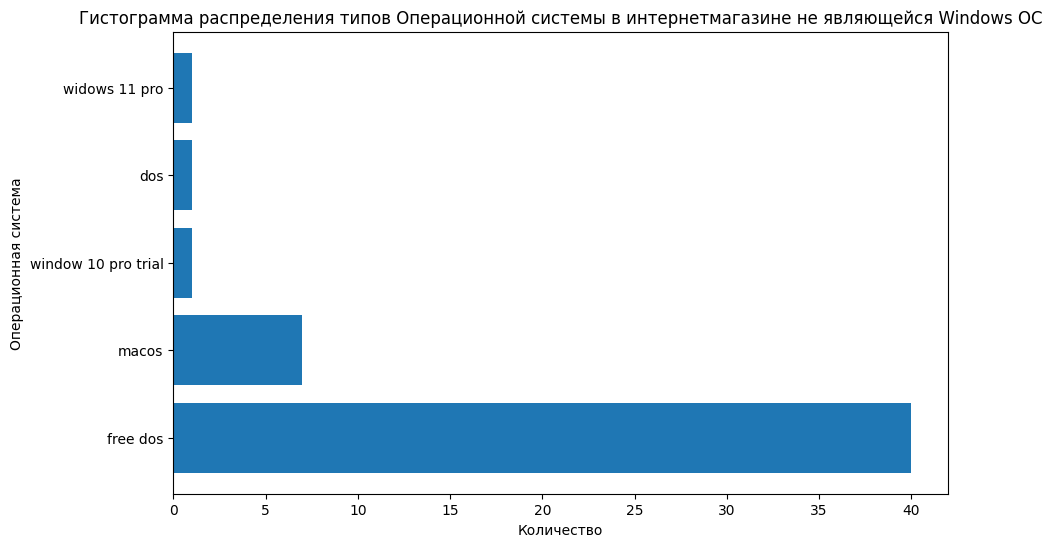

In [173]:

plt.figure(figsize=(10, 6))
plt.barh(name_count_non_windows_ram.index, name_count_non_windows_ram.values)
plt.title('Гистограмма распределения типов Операционной системы в интернетмагазине не являющейся Windows ОС')
plt.xlabel('Количество')
plt.ylabel('Операционная система')
plt.show()

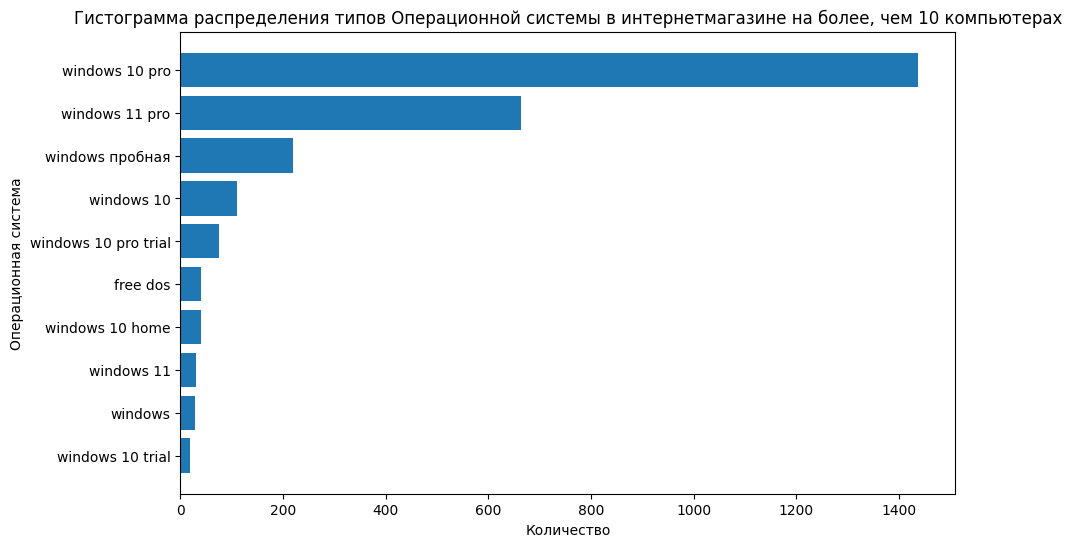

In [174]:
# гистограмма для признака Операционная система
# Фильтруем Операционные системы, количество которых больше 10
filtered_counts_10_ram = mostly_counts[mostly_counts > 10]
filtered_counts_10_ram = filtered_counts_10_ram.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(filtered_counts_10_ram.index, filtered_counts_10_ram.values)
plt.title('Гистограмма распределения типов Операционной системы в интернетмагазине на более, чем 10 компьютерах')
plt.xlabel('Количество')
plt.ylabel('Операционная система')
plt.show()

In [175]:
# Оценим медианные значения цены в разрезе операционных систем, установленных более чем на 10 компьютерах.
ram_more_10 = filtered_counts_10_ram.index
ram_more_10_filled_dataset = df_copy[df_copy['Операционная система'].isin(ram_more_10)]
ram_more_10_filled_dataset.groupby('Операционная система')['Цена товара (руб)'].median()


,Цена товара (руб)
Операционная система,
free dos,46040.0
windows,55000.0
windows 10,65404.0
windows 10 home,75985.0
windows 10 pro,73224.0
windows 10 pro trial,73200.0
windows 10 trial,54000.0
windows 11,72400.0
windows 11 pro,77167.0


In [176]:
# Оценим описательные статистики цены компьютеров в разрезе видов Видеопроцессора
ram_more_10_filled_dataset.groupby('Операционная система')['Цена товара (руб)'].describe()


,count,mean,std,min,25%,50%,75%,max
Операционная система,,,,,,,,
free dos,40.0,49257.625000,20195.795432,11540.0,32165.0,46040.0,67640.0,95536.0
windows,29.0,52949.137931,18227.904461,15155.0,36000.0,55000.0,68800.0,74400.0
windows 10,110.0,66912.327273,26084.534971,4000.0,52530.0,65404.0,77250.0,149995.0
windows 10 home,40.0,70590.625000,17220.903450,16005.0,72767.5,75985.0,78425.0,82130.0
windows 10 pro,1438.0,74895.505563,33600.771684,12500.0,49000.0,73224.0,90580.0,214954.0
windows 10 pro trial,76.0,82718.421053,35579.397449,34900.0,61800.0,73200.0,91400.0,235900.0
windows 10 trial,18.0,59771.666667,13511.942539,36550.0,54000.0,54000.0,72000.0,87880.0
windows 11,30.0,79389.033333,44040.872152,18599.0,46240.0,72400.0,100392.5,202391.0
windows 11 pro,663.0,76225.092006,26507.970155,21000.0,62823.0,77167.0,87300.0,155700.0


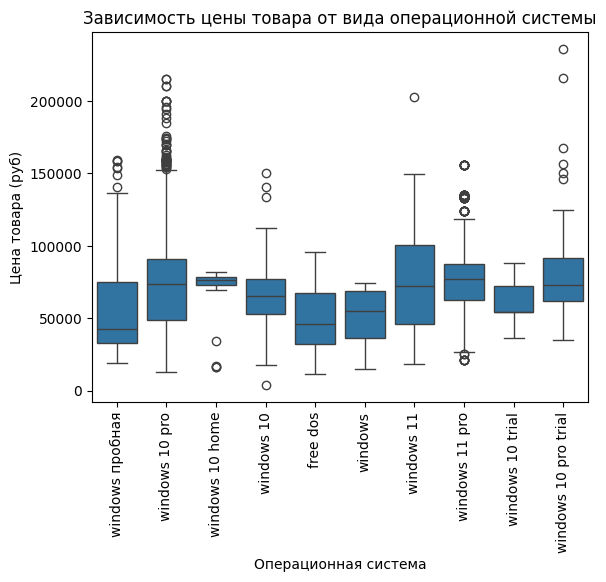

In [177]:
# Построим диаграммы "ящик с усами"  передав в качестве x - виды операционной системы, а в качестве y - цену компьютера
sns.boxplot(x='Операционная система',y='Цена товара (руб)', data=ram_more_10_filled_dataset)
plt.xticks(rotation = 90)
plt.title('Зависимость цены товара от вида операционной системы')
plt.show()


**Выводы:**
1. В датасете по признаку 'Операционная система' заполнены не все значения, количество незаполненных значений составляет 384, это 12,51 %
2. Количество уникальных значений по признаку Операционная система составляет 29.
3.  Чаще всего на  продаваемых компьютерах в интернет магазине установленна операционная система - Windows 10 Pro. Она встречается в датасете - 1433, это 53.37 % от всех заполненных значений. На втором месте Windows 11 Pro, её количество  663. Всего в топ-10 по признаку 'Операционная система' 9 из 10 позиций представлены различными видами операционной системы  Windows.
6. В датасете встречаются названия операционной системы, которые повторяются менее 10 раз. Количество таких названий - 45, что составляет 1.47%
7. В целом медианная цена по операционным системам, установленным более чем на 10 компьютерах отличается, что может свидетельствовать о влияниии вида операционной системы на Цену компьютера.

# 4.2.4. Тип оперативной памяти

Неграфический анализ характеристики  Тип оперативной памяти

In [178]:
df_copy['Тип оперативной памяти'].describe()

,Тип оперативной памяти
count,3069
unique,8
top,DDR 4
freq,2637


In [179]:
df_copy['Тип оперативной памяти'].value_counts()

,count
Тип оперативной памяти,
DDR 4,2637
не заполнено,331
DDR 3,81
DDR 5,14
4Gb,2
16,2
16 Гб,1
4GB,1


In [180]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     3069 non-null   int64  
 1   Наименование товара            3069 non-null   object 
 2   Цена товара (руб)              3069 non-null   int64  
 3   Количество продаж              768 non-null    object 
 4   Видеопроцессор                 3069 non-null   object 
 5   Операционная система           3069 non-null   object 
 6   Процессор_тип                  3069 non-null   object 
 7   Количество ядер процессора     2826 non-null   float64
 8   Тип оперативной памяти         3069 non-null   object 
 9   Объем оперативной памяти (Гб)  2718 non-null   Int64  
 10  Объем накопителя HDD (Гб)      861 non-null    float64
 11  Объем накопителя SSD (Гб)      2822 non-null   Int64  
dtypes: Int64(2), float64(2), int64(2), object(6)
mem

In [181]:
# Фильтруем данные, исключая записи с названием 'не заполнено'
filtered_dataset_type_ram = df_copy[df_copy['Тип оперативной памяти'] != 'не заполнено']

In [182]:
# Посмотрим на наиболее часто встречающееся название и процент такого названия в датасете
type_counts_type_ram = filtered_dataset_type_ram['Тип оперативной памяти'].value_counts()
type_counts_type_ram

,count
Тип оперативной памяти,
DDR 4,2637
DDR 3,81
DDR 5,14
4Gb,2
16,2
16 Гб,1
4GB,1


In [183]:
# Находим наиболее часто встречающееся название и его количество
# Посмотрим на наиболее часто встречающееся название и процент такого названия в датасете

total_count_type_ram = type_counts_type_ram.count()
most_common_count_type_ram = type_counts_type_ram.max()
most_common_name_type_ram = type_counts_type_ram.idxmax()

print(f"Количество заполненных значений Тип оперативной памяти: {total_count_type_ram}")
print(f"Наиболее часто встречающееся название: {most_common_name_type_ram}")




Количество заполненных значений Тип оперативной памяти: 7
Наиболее часто встречающееся название: DDR 4


In [184]:
# Общее количество записей в  колонке Тип операционная система
general_count_type_ram = df_copy['Тип оперативной памяти'].count()
# Общее количество записей в отфильтрованной колонке Тип операционной системы
total_count_type_ram = filtered_dataset_type_ram['Тип оперативной памяти'].count()

# Рассчитываем процент от указанных значений Тип операционной системы
percentage = (most_common_count_type_ram / total_count_type_ram) * 100

# Рассчитываем процент от всех значений Тип операционная система
percentage_all = (most_common_count /general_count_type_ram) * 100

# Выводим результат
print(f"Количество заполненных значений Тип оперативной памяти: {total_count_type_ram}")
print(f"Наиболее часто встречающееся название: {most_common_name_type_ram}")
print(f"Количество: {most_common_count_type_ram}")
print(f"Процент от указанных значений Тип оперативной памяти: {percentage:.2f}%")
print(f"Процент всех значений Тип оперативной памяти: {percentage_all:.2f}%")

Количество заполненных значений Тип оперативной памяти: 2738
Наиболее часто встречающееся название: DDR 4
Количество: 2637
Процент от указанных значений Тип оперативной памяти: 96.31%
Процент всех значений Тип оперативной памяти: 18.02%


In [185]:
# Посмотрим сколько названий Тип оперативной памяти не заполнено
# считаем количество незаполненных значений
null_count_type_ram = general_count_type_ram - total_count_type_ram

# Рассчитываем процент
percentage = (null_count_type_ram / general_count_type_ram) * 100
# Выводим результат
print(f"Количество незаполненных названий: {null_count_type_ram}")
print(f"Процент незаполненных названий: {percentage:.2f}%")

Количество незаполненных названий: 331
Процент незаполненных названий: 10.79%


In [186]:
# гистограмма для признака Тип оперативной памяти
# выделим топ-5 Типов оперативной памяти
type_ram_top_5 = filtered_dataset_type_ram['Тип оперативной памяти'].value_counts()[:5]


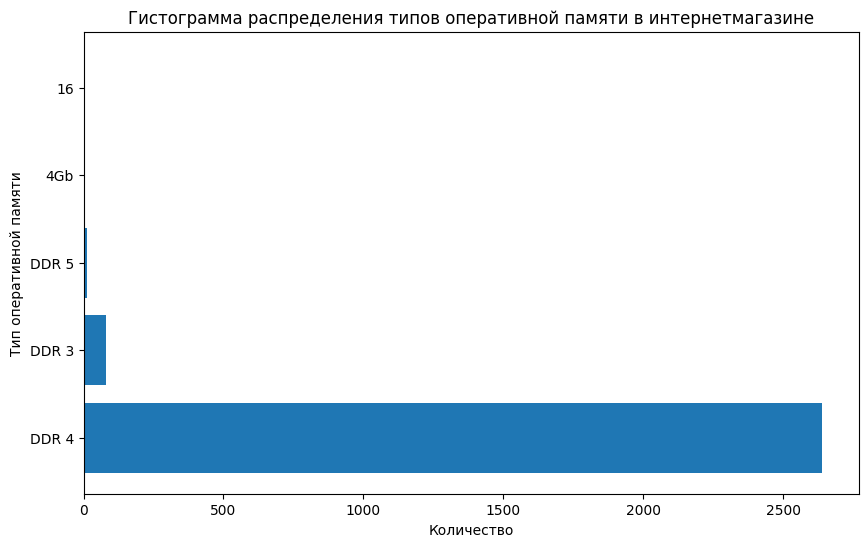

In [187]:
plt.figure(figsize=(10, 6))
plt.barh(type_ram_top_5.index, type_ram_top_5.values)
plt.title('Гистограмма распределения типов оперативной памяти в интернетмагазине')
plt.xlabel('Количество')
plt.ylabel('Тип оперативной памяти')
plt.show()

In [188]:
ram_top_5 = type_ram_top_5.index
ram_top_5_filled_dataset = df_copy[df_copy['Тип оперативной памяти'].isin(ram_top_5)]
ram_top_5_filled_dataset.groupby('Тип оперативной памяти')['Цена товара (руб)'].median()

,Цена товара (руб)
Тип оперативной памяти,
16,60050.0
4Gb,114000.0
DDR 3,36520.0
DDR 4,72760.0
DDR 5,146035.0


In [189]:
# Оценим описательные статистики цены компьютеров в разрезе Типа оперативной памяти.
ram_top_5_filled_dataset.groupby('Тип оперативной памяти')['Цена товара (руб)'].describe()



,count,mean,std,min,25%,50%,75%,max
Тип оперативной памяти,,,,,,,,
16,2.0,60050.000000,12374.368671,51300.0,55675.0,60050.0,64425.0,68800.0
4Gb,2.0,114000.000000,8485.281374,108000.0,111000.0,114000.0,117000.0,120000.0
DDR 3,81.0,40237.666667,18722.469653,12500.0,23800.0,36520.0,58000.0,77000.0
DDR 4,2637.0,73302.027683,31291.179989,2700.0,50400.0,72760.0,87300.0,214954.0
DDR 5,14.0,161097.928571,40612.064919,120000.0,129332.5,146035.0,200000.0,235900.0


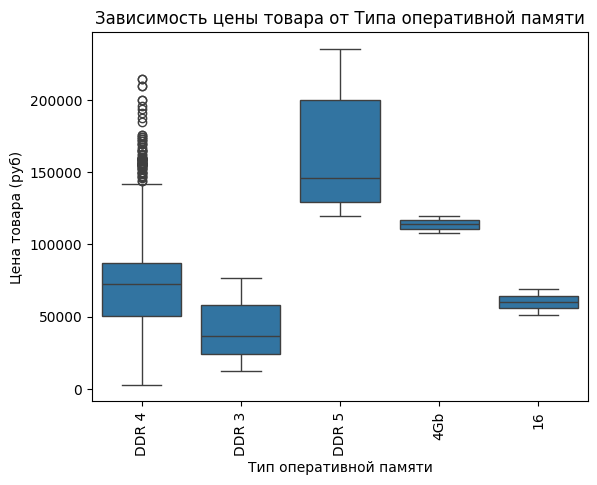

In [190]:
# Построим диаграммы "ящик с усами"  передав в качестве x - Тип оперативной памяти , а в качестве y - цену компьютера
sns.boxplot(x='Тип оперативной памяти',y='Цена товара (руб)', data=ram_top_5_filled_dataset)
plt.xticks(rotation = 90)
plt.title('Зависимость цены товара от Типа оперативной памяти')
plt.show()


**Выводы:**
1. В датасете по признаку 'Тип оперативной памяти' заполнены не все значения, количество незаполненных значений составляет 384, это 10,8 %
2. Количество уникальных значений по признаку Тип оперативной памяти составляет 8.
3. Опретивная память - DDR 4 установлена  на  продаваемых компьютерах в интернет магазине в большинстве случаев. Она встречается в датасете - 2637, это 96.21 % от всех заполненных значений. На втором месте DDR 3, её количество  81. Всего исходя из графика в топ-5 по признаку 'Тип оперативной памяти' на компью"4GB" не являются названиями типа оперативной памяти, возможно в записи данных произошла ошибка.
4.	Медианная цена по топ-5 типов оперативной памяти существенно отличается, что может свидетельствовать о влияниии типа оперативной памяти на Цену компьютера.

Вспомним цель анализа данных:
определение технических характеристик наиболее популярных персональных компьютеров, выкладываемых на онлайн-площадках

# 4.2.5. Количество продаж

Для определения технических характеристик наиболее полулярных персональных компьютеров необходимо оценить признак - Количество продаж, так как именно она показывает какие компьютеры покупаются лучше всего.

**Количество продаж**

In [191]:

df_copy['Количество продаж']

,Количество продаж
0,NaN
1,Купили более 10 раз
2,Купили более 200 раз
3,Купили более 40 раз
4,Купили более 5 раз
...,...
3064,NaN
3065,NaN
3066,NaN
3067,NaN


In [192]:
# для анализа данные по компьютерам, которые не покупали не явяются необходимыми, скопируем датасет и удалим их
df_sale = df_copy.dropna(subset=['Количество продаж'])
df_sale

,product_id,Наименование товара,Цена товара (руб),Количество продаж,Видеопроцессор,Операционная система,Процессор_тип,Количество ядер процессора,Тип оперативной памяти,Объем оперативной памяти (Гб),Объем накопителя HDD (Гб),Объем накопителя SSD (Гб)
1,19347937,офисный компьютер robotcomp казначей v1,39237,Купили более 10 раз,Intel UHD Graphics 630,windows пробная,intel core i5,6.0,DDR 4,8,NaN,480
2,19348951,игровой компьютер robotcomp м16 2.0 v1,76188,Купили более 200 раз,NVIDIA GeForce GTX 1660,windows пробная,intel core i5,6.0,DDR 4,16,NaN,960
3,19355097,игровой компьютер robotcomp m-16 v1,55625,Купили более 40 раз,NVIDIA GeForce GTX 1650,windows пробная,intel core i5,6.0,DDR 4,16,NaN,480
4,19358744,игровой компьютер robotcomp анаконда 2.0 v1,128284,Купили более 5 раз,NVIDIA GeForce RTX 3070,windows пробная,intel core i5,10.0,DDR 4,16,NaN,960
5,19364495,игровой компьютер robotcomp f22 raptor v1,48386,Купили более 30 раз,NVIDIA GeForce GTX 1650,windows пробная,intel core i3,4.0,DDR 4,16,NaN,480
...,...,...,...,...,...,...,...,...,...,...,...,...
2244,148552985,игровой компьютер i7-2600 16gb ssd 512gb rtx 2...,59900,Купили менее 5 раз,NVIDIA GeForce RTX 2060,windows,intel core i7,4.0,DDR 3,16,NaN,512
2253,148628719,"компьютер beelink sei 12, 32/500гб",58047,Купили менее 5 раз,не заполнено,windows 11 pro,intel core i5,10.0,DDR 4,<NA>,NaN,500
2261,148709017,игровой компьютер best family midi intel core ...,37998,Купили менее 5 раз,AMD Radeon RX 550,windows 10 pro,intel core i5,6.0,DDR 4,8,NaN,512
2264,148745771,игровой компьютер /8gb/ssd-256/hdd-500/монитор...,41600,Купили менее 5 раз,NVIDIA GeForce GTX 750,windows 11 pro,intel e3,8.0,не заполнено,<NA>,500.0,256


In [193]:
df_sale['Количество продаж'].describe()


,Количество продаж
count,768
unique,17
top,Купили менее 5 раз
freq,423


In [194]:
# посмотрим на количество уникальных значений
df_sale['Количество продаж'].value_counts()

,count
Количество продаж,
Купили менее 5 раз,423
Купили более 5 раз,139
Купили более 10 раз,83
Купили более 20 раз,38
Купили более 40 раз,17
Купили более 30 раз,17
Купили более 100 раз,15
Купили более 80 раз,7
Купили более 50 раз,7


In [195]:
# наибольшее количество продаж
top_10_sale = df_sale['Количество продаж'].value_counts().head(10)
print(top_10_sale)


Количество продаж
Купили менее 5 раз      423
Купили более 5 раз      139
Купили более 10 раз      83
Купили более 20 раз      38
Купили более 40 раз      17
Купили более 30 раз      17
Купили более 100 раз     15
Купили более 80 раз       7
Купили более 50 раз       7
Купили более 200 раз      6
Name: count, dtype: int64


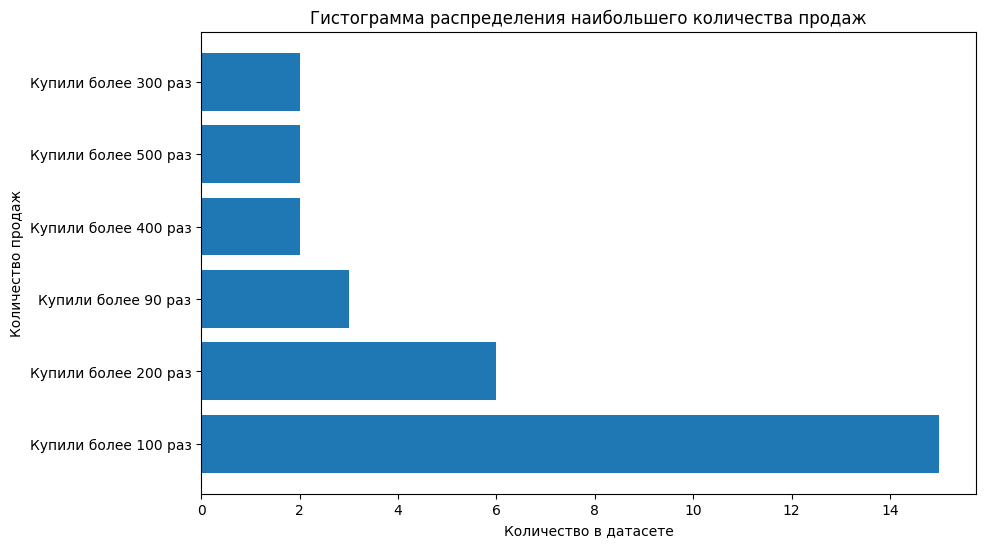

In [196]:
# построим гистограмму распределения наибольшего количества продаж
sale_types = ['Купили более 500 раз', 'Купили более 400 раз', 'Купили более 300 раз','Купили более 200 раз', 'Купили более 100 раз', 'Купили более 90 раз']
prise_sale_dataset = df_sale[df_sale['Количество продаж'].isin(sale_types)]
top_sale = prise_sale_dataset['Количество продаж'].value_counts()
sorted_sale_types = top_sale.sort_values(ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(top_sale.index, top_sale.values)
plt.title('Гистограмма распределения наибольшего количества продаж')
plt.xlabel('Количество в датасете')
plt.ylabel('Количество продаж')
plt.show()


Вывод:
1.	В представленных данных имеются незаполненные значения по признаку «Количество продаж», для анализа данного признака, а также его взаимосвязи с иными признаками незаполненные значения были удалены.
2.	Всего в датасете встречается 17 уникальных значений количества продаж, количество продаж объединено в группы начиная от купили менее 5 раз, и до купили более 500 раз.
3.	 В рамках анализа наибольший интерес представляют товары, которые купили от 100 и до более 500 раз.

# **4.3. Взаимосвязь категориальных и количественных признаков**

# 4.3.1 взаимосвязь признака количество продаж  - цена товара

In [197]:
# Оценим описательные статистики цены товаров в разрезе количества продаж
df_sale.groupby('Количество продаж')['Цена товара (руб)'].describe()

,count,mean,std,min,25%,50%,75%,max
Количество продаж,,,,,,,,
Купили более 10 раз,83.0,50424.602410,31260.134968,2418.0,32379.00,41704.0,64876.00,194299.0
Купили более 100 раз,15.0,47899.800000,24684.899161,19500.0,34435.00,40971.0,54808.00,117108.0
Купили более 20 раз,38.0,52412.447368,34498.189166,495.0,34437.00,47213.5,65671.75,214954.0
Купили более 200 раз,6.0,45212.833333,16202.414048,30628.0,36955.00,40347.0,46043.75,76188.0
Купили более 30 раз,17.0,43013.294118,29488.941035,2785.0,29209.00,32146.0,48386.00,117108.0
Купили более 300 раз,2.0,24474.500000,7802.923330,18957.0,21715.75,24474.5,27233.25,29992.0
Купили более 40 раз,17.0,46180.470588,28311.006985,254.0,34317.00,38795.0,65115.00,103062.0
Купили более 400 раз,2.0,29303.000000,4686.703746,25989.0,27646.00,29303.0,30960.00,32617.0
Купили более 5 раз,139.0,60477.330935,41028.253694,605.0,34125.00,47655.0,75560.50,214954.0


In [198]:
# Оценим медианные значения цены товара с в разрезе количества продаж
df_sale_price = df_sale.groupby('Количество продаж')['Цена товара (руб)'].median()
df_sale_price

,Цена товара (руб)
Количество продаж,
Купили более 10 раз,41704.0
Купили более 100 раз,40971.0
Купили более 20 раз,47213.5
Купили более 200 раз,40347.0
Купили более 30 раз,32146.0
Купили более 300 раз,24474.5
Купили более 40 раз,38795.0
Купили более 400 раз,29303.0
Купили более 5 раз,47655.0


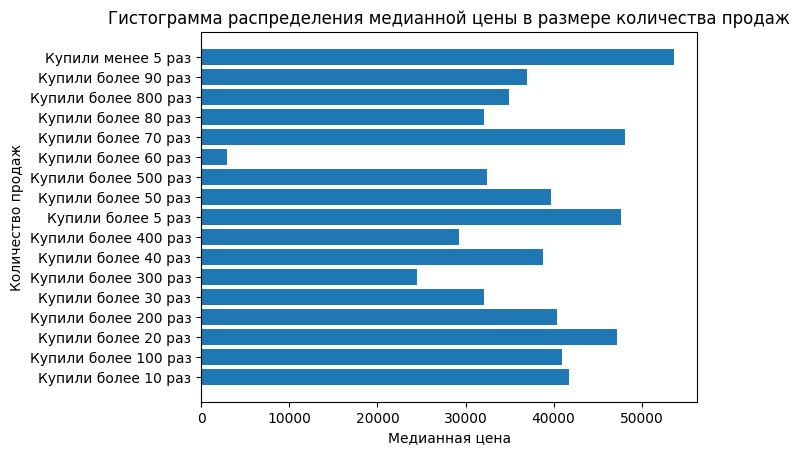

In [199]:
# построим гистограмму распределения по медианной цене и количеству продаж
plt.barh(df_sale_price.index, df_sale_price.values)
plt.ylabel('Количество продаж')
plt.xlabel('Медианная цена')
plt.title('Гистограмма распределения медианной цены в размере количества продаж')
plt.show()

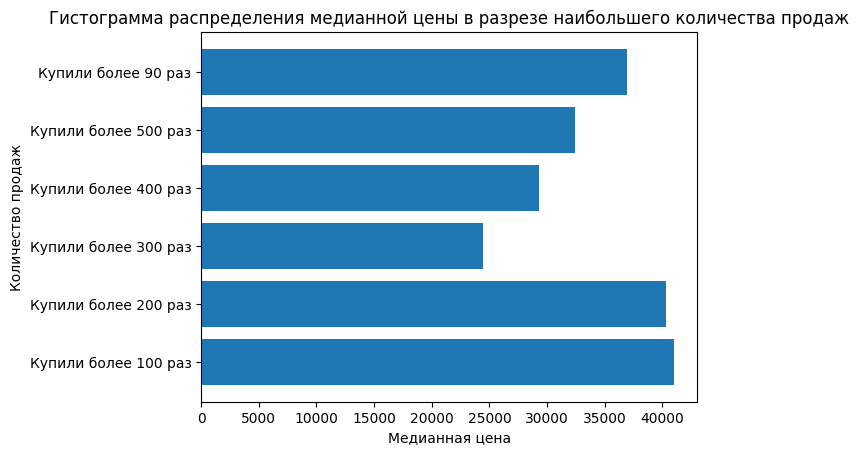

In [200]:
# запишем наиболее интересные для анализа значения в переменную
sale_types = ['Купили более 500 раз', 'Купили более 400 раз', 'Купили более 300 раз','Купили более 200 раз', 'Купили более 100 раз', 'Купили более 90 раз']
prise_sale_dataset = df_sale[df_sale['Количество продаж'].isin(sale_types)]
df_sale_price_max = prise_sale_dataset.groupby('Количество продаж')['Цена товара (руб)'].median()
plt.barh(df_sale_price_max.index, df_sale_price_max.values)
plt.ylabel('Количество продаж')
plt.xlabel('Медианная цена')
plt.title('Гистограмма распределения медианной цены в разрезе наибольшего количества продаж')
plt.show()


Вывод: При анализе диаграмм по признаку Количество продаж - Цена товара можно увидеть, что наибольшей популярностью пользуются компьютеры по цене товара до 40 000 рублей

# 4.3.2. взаимосвязь признака количество продаж и объем оперативной памяти

In [201]:
# Получим датафрейм с непустыми значениями в столбце "Объем оперативной памяти (Гб)".
filtered_volume_ram_df = df_sale[~df_sale['Объем оперативной памяти (Гб)'].isna()]
filtered_volume_ram_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 645 entries, 1 to 2281
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     645 non-null    int64  
 1   Наименование товара            645 non-null    object 
 2   Цена товара (руб)              645 non-null    int64  
 3   Количество продаж              645 non-null    object 
 4   Видеопроцессор                 645 non-null    object 
 5   Операционная система           645 non-null    object 
 6   Процессор_тип                  645 non-null    object 
 7   Количество ядер процессора     642 non-null    float64
 8   Тип оперативной памяти         645 non-null    object 
 9   Объем оперативной памяти (Гб)  645 non-null    Int64  
 10  Объем накопителя HDD (Гб)      146 non-null    float64
 11  Объем накопителя SSD (Гб)      643 non-null    Int64  
dtypes: Int64(2), float64(2), int64(2), object(6)
memory us

In [202]:
# Оценим описательные статистики Объема оперативной памяти в разрезе количества продаж

filtered_volume_ram_df.groupby('Количество продаж')['Объем оперативной памяти (Гб)'].describe()

,count,mean,std,min,25%,50%,75%,max
Количество продаж,,,,,,,,
Купили более 10 раз,78.0,16.487179,9.914889,4.0,8.0,16.0,16.0,64.0
Купили более 100 раз,15.0,16.533333,7.069721,8.0,16.0,16.0,16.0,32.0
Купили более 20 раз,34.0,16.352941,9.565983,4.0,16.0,16.0,16.0,64.0
Купили более 200 раз,5.0,22.4,8.763561,16.0,16.0,16.0,32.0,32.0
Купили более 30 раз,15.0,18.4,9.29516,4.0,16.0,16.0,24.0,32.0
Купили более 300 раз,2.0,8.0,0.0,8.0,8.0,8.0,8.0,8.0
Купили более 40 раз,14.0,14.571429,6.583362,4.0,10.0,16.0,16.0,32.0
Купили более 400 раз,2.0,12.0,5.656854,8.0,10.0,12.0,14.0,16.0
Купили более 5 раз,116.0,21.482759,13.182652,4.0,16.0,16.0,32.0,64.0


In [203]:
# Оценим медианные значения объема оперативной памяти в разрезе количества продаж
filtered_volume_ram_df.groupby('Количество продаж')['Объем оперативной памяти (Гб)'].median()

,Объем оперативной памяти (Гб)
Количество продаж,
Купили более 10 раз,16.0
Купили более 100 раз,16.0
Купили более 20 раз,16.0
Купили более 200 раз,16.0
Купили более 30 раз,16.0
Купили более 300 раз,8.0
Купили более 40 раз,16.0
Купили более 400 раз,12.0
Купили более 5 раз,16.0


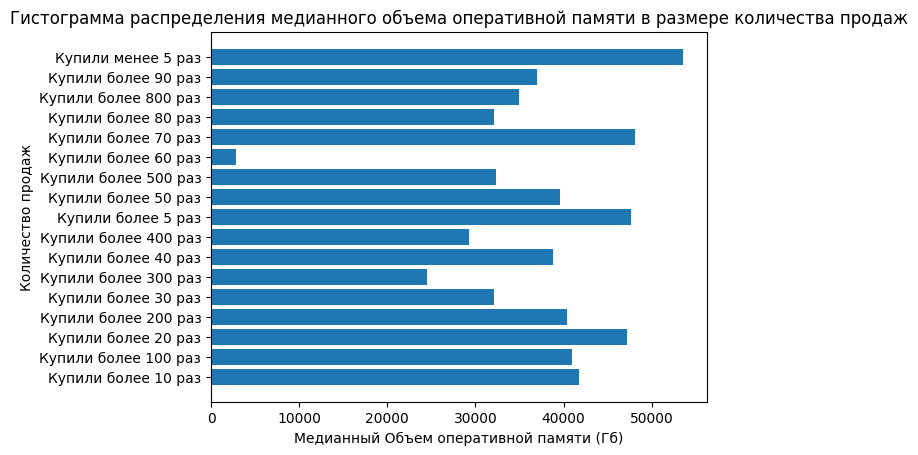

In [204]:
# построим гистограмму распределения по медианной цене и количеству продаж
df_volume_ram_price = filtered_volume_ram_df.groupby('Количество продаж')['Объем оперативной памяти (Гб)'].median()
plt.barh(df_sale_price.index, df_sale_price.values)
plt.ylabel('Количество продаж')
plt.xlabel('Медианный Объем оперативной памяти (Гб)')
plt.title('Гистограмма распределения медианного объема оперативной памяти в размере количества продаж')
plt.show()

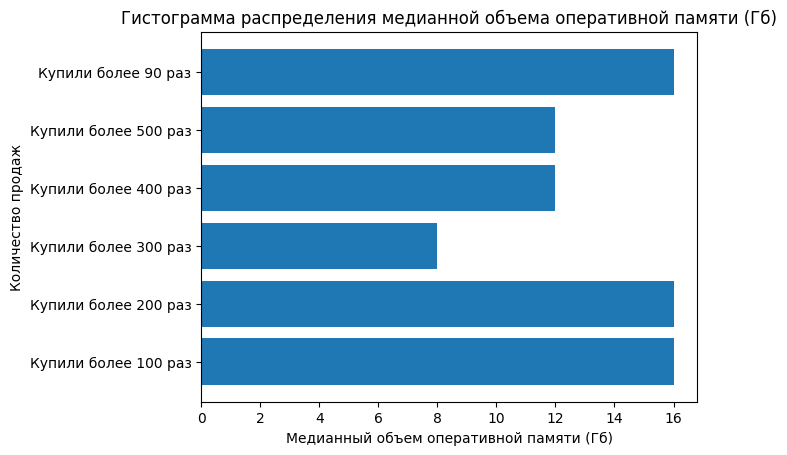

In [205]:
# в sale_types сохранены данные о покупках от 90 до 500 раз
df_volume_ram_price_max = filtered_volume_ram_df[filtered_volume_ram_df['Количество продаж'].isin(sale_types)]
df_sale_ram_max = df_volume_ram_price_max.groupby('Количество продаж')['Объем оперативной памяти (Гб)'].median()
plt.barh(df_sale_ram_max.index, df_sale_ram_max.values)
plt.ylabel('Количество продаж')
plt.xlabel('Медианный объем оперативной памяти (Гб)')
plt.title('Гистограмма распределения медианной объема оперативной памяти (Гб)')
plt.show()

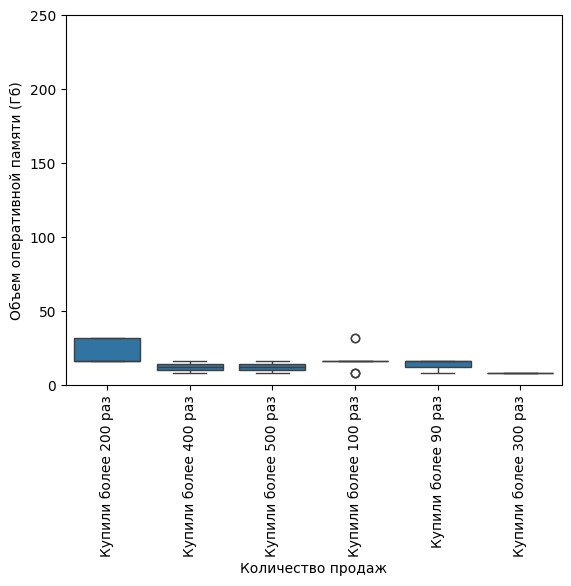

In [206]:
sns.boxplot(x='Количество продаж',y='Объем оперативной памяти (Гб)', data=df_volume_ram_price_max)
plt.axis(ymin=0, ymax=250)
plt.xticks(rotation = 90)
plt.show()

**Вывод:**
При анализе по признаку Количество продаж - Объем оперативной памяти можно увидеть что наибольшей популярностью пользуется Объем оперативной памяти в размере от 14 до 16 Гб

# 4.3.3. взаимосвязь признака количество продаж и объем накопителя HDD (Гб)

In [207]:
# Получим датафрейм с непустыми значениями в столбце Объем накопителя HDD (Гб).

filtered_volume_hdd_df = df_sale[~df_sale['Объем накопителя HDD (Гб)'].isna()]
filtered_volume_hdd_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 24 to 2281
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     147 non-null    int64  
 1   Наименование товара            147 non-null    object 
 2   Цена товара (руб)              147 non-null    int64  
 3   Количество продаж              147 non-null    object 
 4   Видеопроцессор                 147 non-null    object 
 5   Операционная система           147 non-null    object 
 6   Процессор_тип                  147 non-null    object 
 7   Количество ядер процессора     147 non-null    float64
 8   Тип оперативной памяти         147 non-null    object 
 9   Объем оперативной памяти (Гб)  146 non-null    Int64  
 10  Объем накопителя HDD (Гб)      147 non-null    float64
 11  Объем накопителя SSD (Гб)      145 non-null    Int64  
dtypes: Int64(2), float64(2), int64(2), object(6)
memory u

In [208]:
# Оценим описательные статистики объема накопителя HDD (Гб) в разрезе количества продаж
filtered_volume_hdd_df.groupby('Количество продаж')['Объем накопителя HDD (Гб)'].describe()

,count,mean,std,min,25%,50%,75%,max
Количество продаж,,,,,,,,
Купили более 10 раз,13.0,1119.076923,415.012141,500.0,1000.0,1000.0,1024.0,2000.0
Купили более 100 раз,4.0,1000.000000,0.000000,1000.0,1000.0,1000.0,1000.0,1000.0
Купили более 20 раз,5.0,1209.600000,442.009955,1000.0,1000.0,1024.0,1024.0,2000.0
Купили более 200 раз,2.0,1000.000000,0.000000,1000.0,1000.0,1000.0,1000.0,1000.0
Купили более 30 раз,3.0,1000.000000,0.000000,1000.0,1000.0,1000.0,1000.0,1000.0
Купили более 40 раз,1.0,1000.000000,NaN,1000.0,1000.0,1000.0,1000.0,1000.0
Купили более 5 раз,32.0,1161.125000,427.326252,500.0,1000.0,1000.0,1024.0,2000.0
Купили более 80 раз,1.0,2000.000000,NaN,2000.0,2000.0,2000.0,2000.0,2000.0
Купили менее 5 раз,86.0,1035.651163,467.713053,250.0,1000.0,1000.0,1024.0,4000.0


In [209]:
# Оценим медианные значения объема накопителя HDD в разрезе количества продаж
volume_hdd_sale_df = filtered_volume_hdd_df.groupby('Количество продаж')['Объем накопителя HDD (Гб)'].median()
volume_hdd_sale_df

,Объем накопителя HDD (Гб)
Количество продаж,
Купили более 10 раз,1000.0
Купили более 100 раз,1000.0
Купили более 20 раз,1024.0
Купили более 200 раз,1000.0
Купили более 30 раз,1000.0
Купили более 40 раз,1000.0
Купили более 5 раз,1000.0
Купили более 80 раз,2000.0
Купили менее 5 раз,1000.0


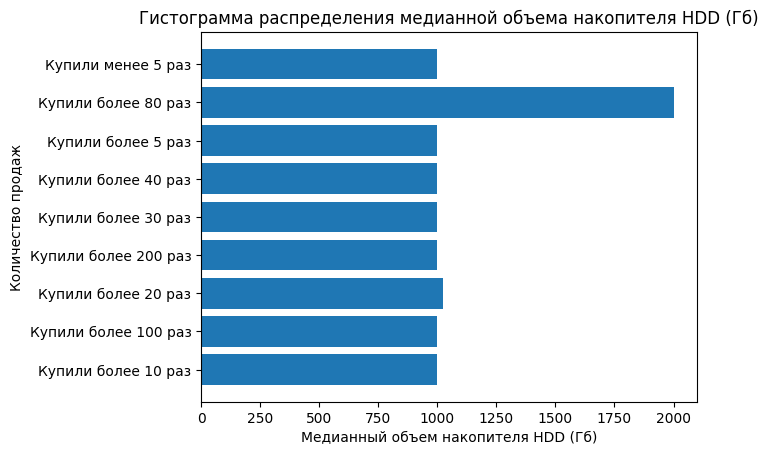

In [210]:
# постороим гистограмму распределения объема накопителя HDD  и Количества продаж

plt.barh(volume_hdd_sale_df.index, volume_hdd_sale_df.values)
plt.ylabel('Количество продаж')
plt.xlabel('Медианный объем накопителя HDD (Гб)')
plt.title('Гистограмма распределения медианной объема накопителя HDD (Гб)')
plt.show()


Вывод: При анализе по признаку Количество продаж - Объем накопителя HDD можно увидеть что наибольшей популярностью пользуется Объем накопителя HDD в размере 1000 ГБ

# 4.3.4. взаимосвязь признака количество продаж и объем накопителя SSD (Гб)

In [211]:
# Получим датафрейм с непустыми значениями в столбце "Объем оперативной памяти (Гб)".
filtered_volume_sdd_df = df_sale[~df_sale['Объем накопителя SSD (Гб)'].isna()]
filtered_volume_sdd_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 659 entries, 1 to 2281
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     659 non-null    int64  
 1   Наименование товара            659 non-null    object 
 2   Цена товара (руб)              659 non-null    int64  
 3   Количество продаж              659 non-null    object 
 4   Видеопроцессор                 659 non-null    object 
 5   Операционная система           659 non-null    object 
 6   Процессор_тип                  659 non-null    object 
 7   Количество ядер процессора     655 non-null    float64
 8   Тип оперативной памяти         659 non-null    object 
 9   Объем оперативной памяти (Гб)  643 non-null    Int64  
 10  Объем накопителя HDD (Гб)      145 non-null    float64
 11  Объем накопителя SSD (Гб)      659 non-null    Int64  
dtypes: Int64(2), float64(2), int64(2), object(6)
memory us

In [212]:
# Оценим описательные статистики Объема накопителя SDD в разрезе количества продаж

filtered_volume_sdd_df.groupby('Количество продаж')['Объем накопителя SSD (Гб)'].describe()

,count,mean,std,min,25%,50%,75%,max
Количество продаж,,,,,,,,
Купили более 10 раз,78.0,500.615385,326.783984,120.0,256.0,480.0,512.0,2048.0
Купили более 100 раз,15.0,458.666667,181.086667,240.0,360.0,480.0,512.0,960.0
Купили более 20 раз,35.0,535.828571,262.824644,240.0,368.0,480.0,512.0,1000.0
Купили более 200 раз,6.0,581.333333,185.949097,480.0,512.0,512.0,512.0,960.0
Купили более 30 раз,15.0,403.2,139.117217,128.0,240.0,480.0,512.0,512.0
Купили более 300 раз,2.0,360.0,169.705627,240.0,300.0,360.0,420.0,480.0
Купили более 40 раз,15.0,519.466667,264.077334,128.0,480.0,480.0,512.0,960.0
Купили более 400 раз,2.0,360.0,169.705627,240.0,300.0,360.0,420.0,480.0
Купили более 5 раз,120.0,585.2,335.653523,120.0,480.0,496.0,512.0,2048.0


In [213]:
# Оценим медианные значения объем накопителя SSD (Гб) в разрезе количества продаж
filtered_volume_sdd_df.groupby('Количество продаж')['Объем накопителя SSD (Гб)'].median()

,Объем накопителя SSD (Гб)
Количество продаж,
Купили более 10 раз,480.0
Купили более 100 раз,480.0
Купили более 20 раз,480.0
Купили более 200 раз,512.0
Купили более 30 раз,480.0
Купили более 300 раз,360.0
Купили более 40 раз,480.0
Купили более 400 раз,360.0
Купили более 5 раз,496.0


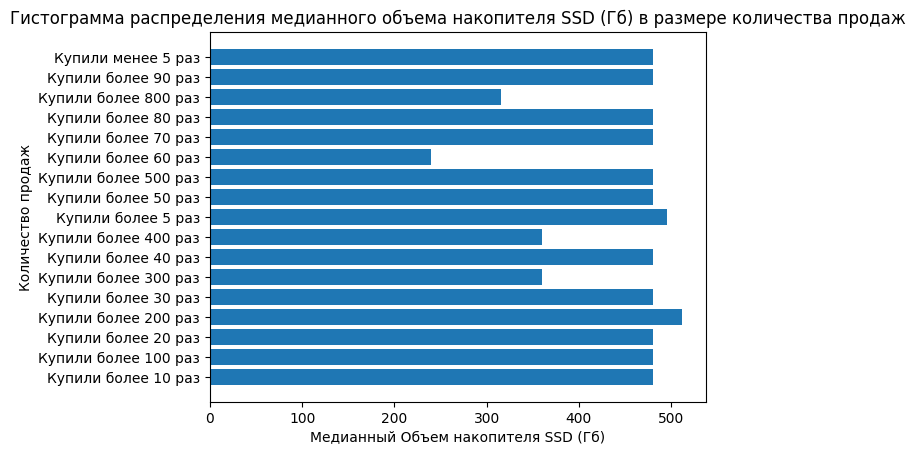

In [214]:
# построим гистограмму распределения по медианной цене и количеству продаж
df_volume_sdd_price = filtered_volume_sdd_df.groupby('Количество продаж')['Объем накопителя SSD (Гб)'].median()
plt.barh(df_volume_sdd_price.index, df_volume_sdd_price.values)
plt.ylabel('Количество продаж')
plt.xlabel('Медианный Объем накопителя SSD (Гб)')
plt.title('Гистограмма распределения медианного объема накопителя SSD (Гб) в размере количества продаж')
plt.show()

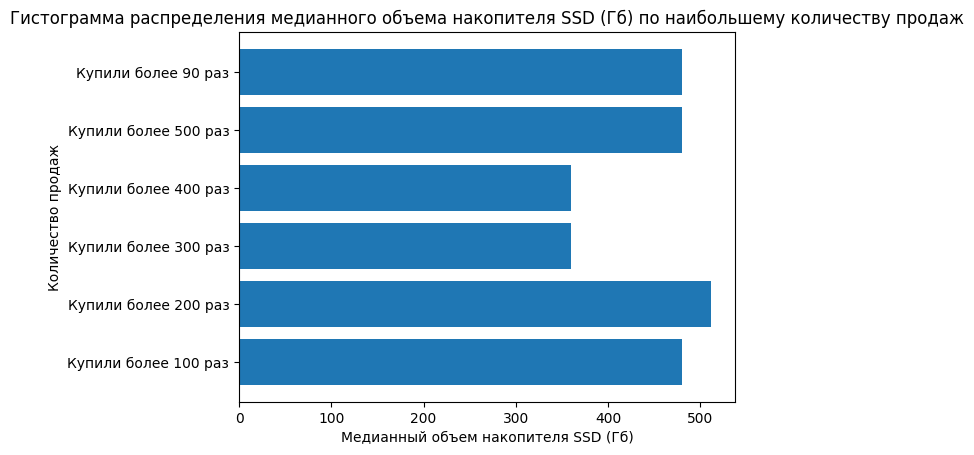

In [215]:
# в sale_types сохранены данные о покупках от 90 до 500 раз
df_volume_sdd_sale_max = filtered_volume_sdd_df[filtered_volume_sdd_df['Количество продаж'].isin(sale_types)]
df_price_sale_sdd_max = df_volume_sdd_sale_max.groupby('Количество продаж')['Объем накопителя SSD (Гб)'].median()
plt.barh(df_price_sale_sdd_max.index, df_price_sale_sdd_max.values)
plt.ylabel('Количество продаж')
plt.xlabel('Медианный объем накопителя SSD (Гб)')
plt.title('Гистограмма распределения медианного объема накопителя SSD (Гб) по наибольшему количеству продаж')
plt.show()

**Вывод:**
При анализе по признаку Количество продаж - Объем накопителя SDD (Гб) можно увидеть что наибольшей популярностью пользуется Объем накопителя SDD в размере от 350 до 500 Гб

# **4.4. Анализ взаимосвязей категориальных признаков**

# 4.4.1. взаимосвязь признака количество продаж - видеопроцессор

In [216]:

# Фильтруем данные, исключая записи с названием 'не заполнено'
filtered_sale_dataset = df_sale[df_sale['Видеопроцессор'] != 'не заполнено']
# посмотрим на топ-5 наиболее часто проданных видеопроцессоров
top_5_sale_videoprocessors = filtered_sale_dataset['Видеопроцессор'].value_counts().head(5)
top_5_sale_videoprocessors_values = top_5_sale_videoprocessors.sort_values(ascending=True)
print(top_5_sale_videoprocessors_values)

Видеопроцессор
NVIDIA GeForce GTX 1650    66
NVIDIA GeForce RTX 3060    70
NVIDIA GeForce GT 1030     79
NVIDIA GeForce RTX 3050    83
AMD Radeon Vega 7          83
Name: count, dtype: int64


In [217]:
name_top_5_sale_videoprocessors = top_5_sale_videoprocessors_values.index
top_5_video_sale_dataset = df_sale[df_sale['Видеопроцессор'].isin(name_top_5_sale_videoprocessors)]


In [218]:

# Построим диаграмму распределения видеопроцессоров в разрезе от наиболее интересного количества продаж
# так как в датасете очень много видеопроцессоров, возьмем для анализа только топ-5 из них

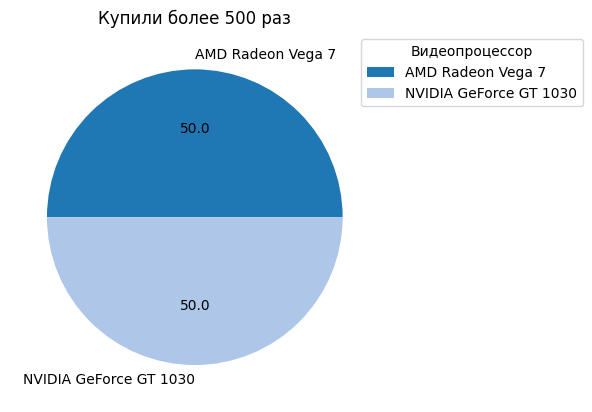

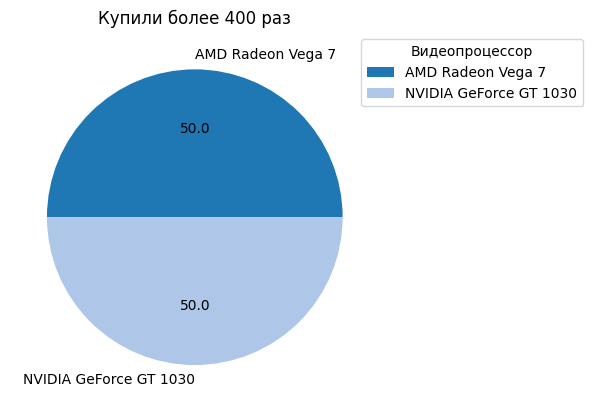

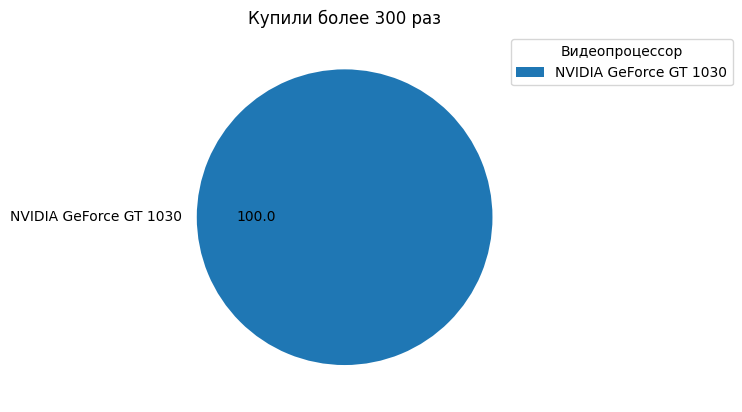

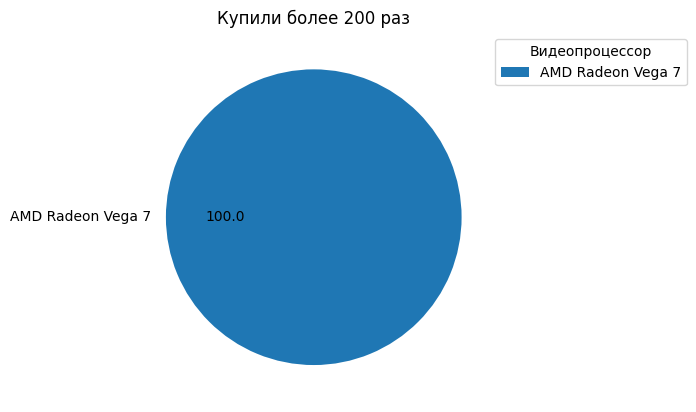

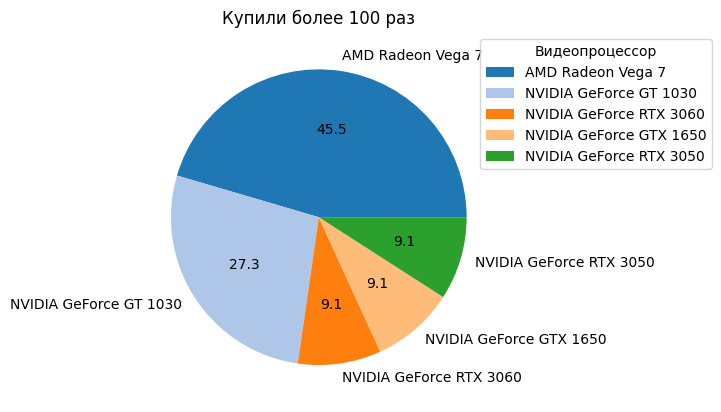

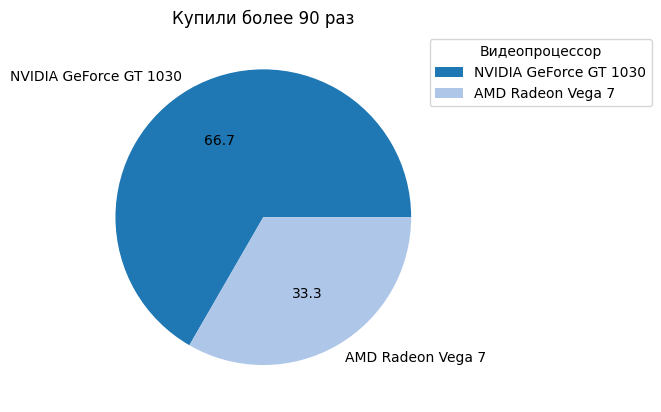

In [219]:
import matplotlib.pyplot as plt

for sale_type in sale_types:
  df = top_5_video_sale_dataset[top_5_video_sale_dataset['Количество продаж']==sale_type]

  videoprocessor_counts = df['Видеопроцессор'].value_counts()
  labels = videoprocessor_counts.index
  colors = dict(zip(labels, plt.cm.tab20.colors[:len(labels)]))

  plt.title(sale_type)
  plt.pie(
      videoprocessor_counts.values,
      labels = labels,
      colors = [colors[key] for key in labels],
      autopct='%.1f'
      )
  plt.legend(labels, title='Видеопроцессор',loc="upper center", bbox_to_anchor=(1, 0, 0.5, 1))
  plt.show()





**Вывод:**
    При анализе диаграмм по признаку Количество продаж - Видеопроцессор можно увидеть, что:
- более 500 раз были проданы компьютеры с установленным Видеопроцессором AMD Radeon Vega 7 (50 %), и NVIDIA GeForce GTX 1030 (50 %).
- более 400 раз были проданы компьютеры с установленным видеопроцессором AMD Radeon Vega 7 (50 %) и NVIDIA GeForce GTX 1030 (50 %).
- более 300 раз были  проданы компьютеры с установленным видеопроцессором NVIDIA GeForce GTX 1030 (100 %).
- более 200 раз были  проданы компьютеры с установленным видеопроцессором MD Radeon Vega 7 (100 %).  
- более 100 раз были проданы компьютеры с установленным видеопроцессором AMD Radeon Vega 7   (45,5 %), NVIDIA GeForce GT 1030 (27,3 %) а также NVIDIA GeForce GTX 1650, NVIDIA GeForce RTX 3060, NVIDIA GeForce RTX 3050 - по 9,1 % каждая.
- более 90 раз были проданы компьютеры с установленными видеопроцессором NVIDIA GeForce GTX 1030 (66,7%) и MD Radeon Vega 7 (33,3%)



# 4.4.2. взаимосвязь признака количество продаж - операционная система

In [220]:
# посмотрим на топ-5 наиболее часто проданных видеопроцессоров
top_5_sale_ram = filtered_dataset_ram['Операционная система'].value_counts().head(5)
top_5_sale_ram_values = top_5_sale_ram.sort_values(ascending=True)
print(top_5_sale_ram_values)



Операционная система
windows 10 pro trial      76
windows 10               110
windows пробная          219
windows 11 pro           663
windows 10 pro          1438
Name: count, dtype: int64


In [221]:
name_top_5_sale_ram = top_5_sale_ram_values.index
top_5_ram_sale_dataset = df_sale[df_sale['Операционная система'].isin(name_top_5_sale_ram)]


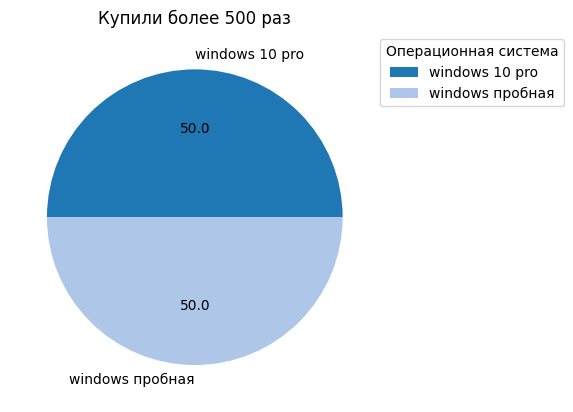

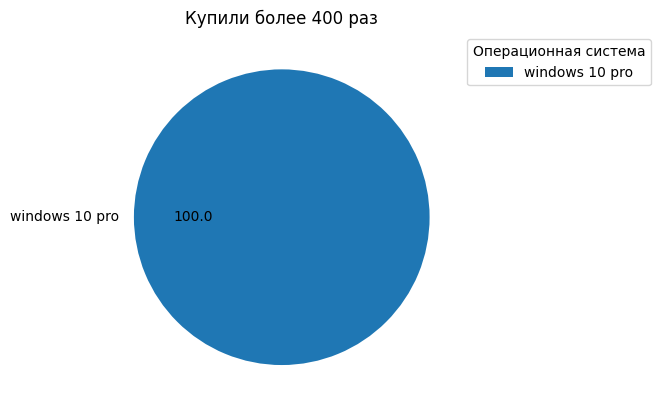

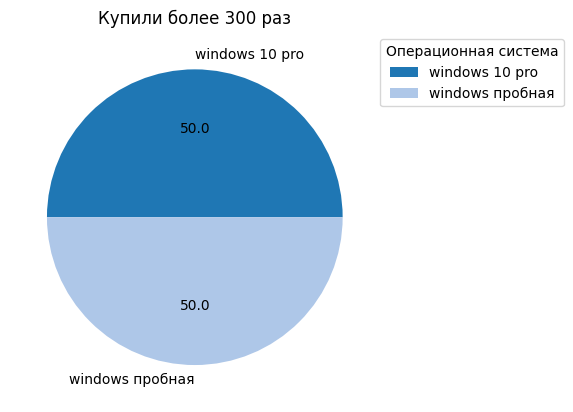

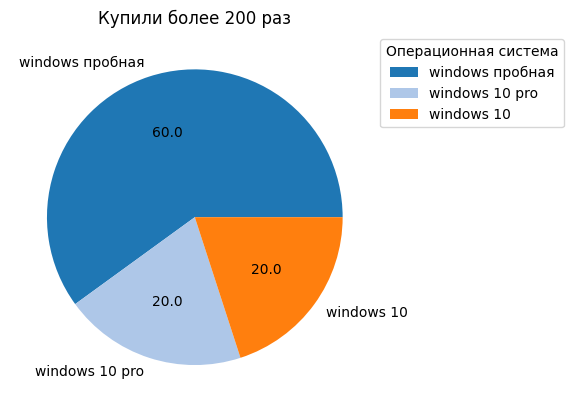

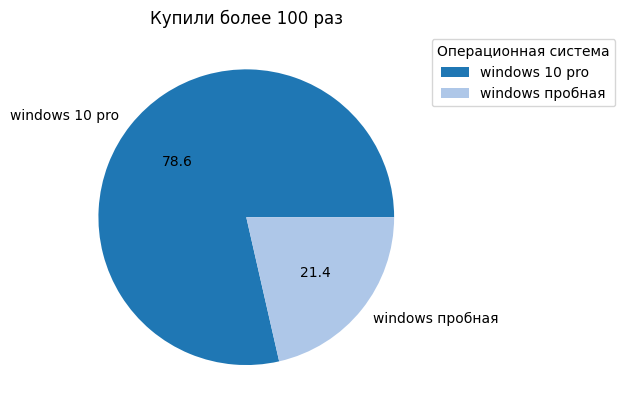

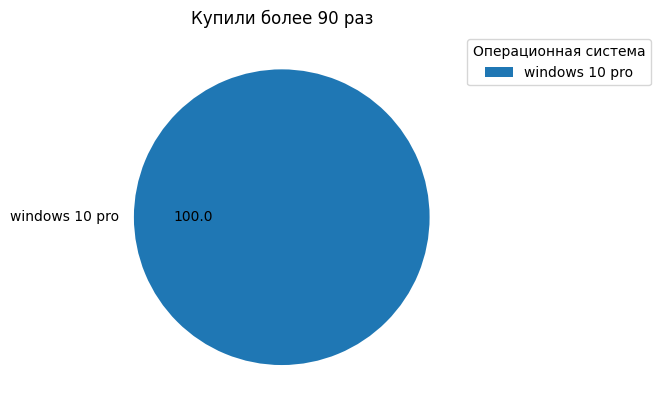

In [222]:
for sale_type in sale_types:
  df = top_5_ram_sale_dataset[top_5_ram_sale_dataset['Количество продаж']==sale_type]

  ram_counts = df['Операционная система'].value_counts()
  labels = ram_counts.index
  colors = dict(zip(labels, plt.cm.tab20.colors[:len(labels)]))

  plt.title(sale_type)
  plt.pie(
      ram_counts.values,
      labels = labels,
      colors = [colors[key] for key in labels],
      autopct='%.1f'
      )
  plt.legend(labels, title='Операционная система',loc="upper center", bbox_to_anchor=(1, 0, 0.5, 1))
  plt.show()


**Вывод:**
При анализе диаграмм по признаку Количество продаж - Операционная система можно увидеть, что:
- более 500 раз были проданы компьютеры с установленной Операционной системой  windows 10 pro (50 %), и windows пробная (50 %).
- более 400 раз были проданы компьютеры с установленной Операционной системой  windows 10 pro (100 %).
- более 300 раз были  проданы компьютеры с установленной Операционной системой  windows 10 pro (50 %) и windows пробная (50 %).
- более 200 раз были  проданы компьютеры с установленной Операционной системой  windows пробная (60 %), windows 10 pro (20 %), windows 10 (20%).
- более 100 раз были проданы компьютеры с установленной Операционной системой  windows 10 pro (78,6%) и windows пробная (21,4 %)
- более 90 раз были проданы компьютеры с установленной Операционной системой  windows 10 pro (100)%  



# 4.4.3. взаимосвязь признака количество продаж - тип оперативной памяти

In [223]:

top_5_sale_type_ram = filtered_dataset_type_ram['Тип оперативной памяти'].value_counts().head(5)
top_5_sale_type_ram_values = top_5_sale_type_ram.sort_values(ascending=True)
print(top_5_sale_type_ram_values)



Тип оперативной памяти
4Gb         2
16          2
DDR 5      14
DDR 3      81
DDR 4    2637
Name: count, dtype: int64


In [224]:
name_top_5_sale_type_ram = top_5_sale_type_ram_values.index
top_5_type_ram_sale_dataset = df_sale[df_sale['Тип оперативной памяти'].isin(name_top_5_sale_type_ram)]


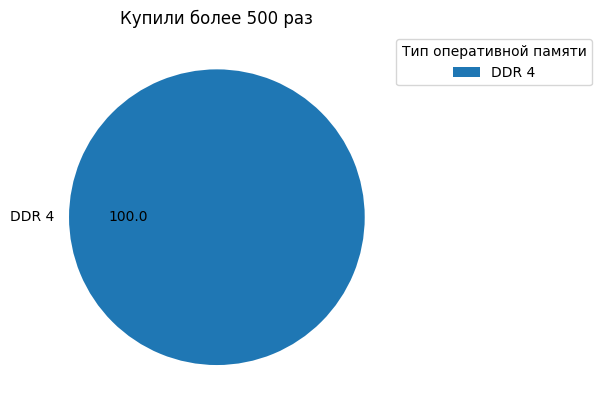

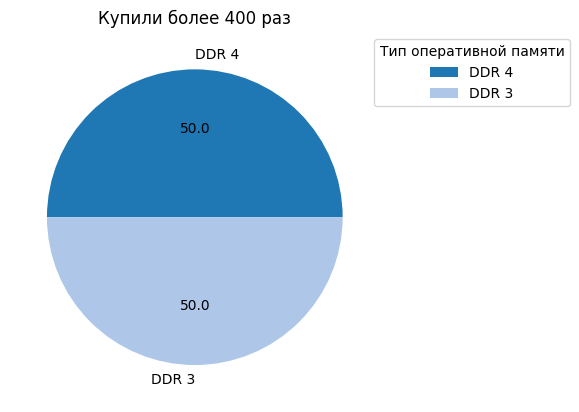

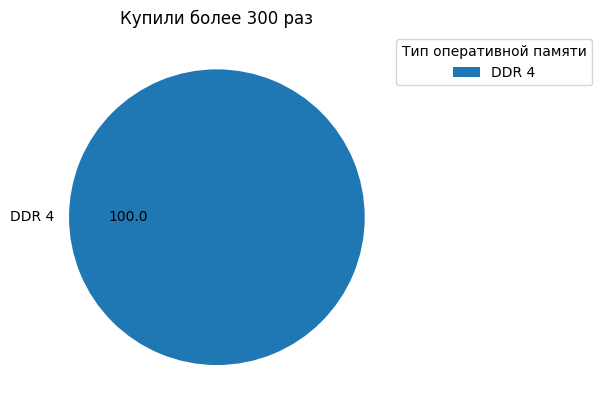

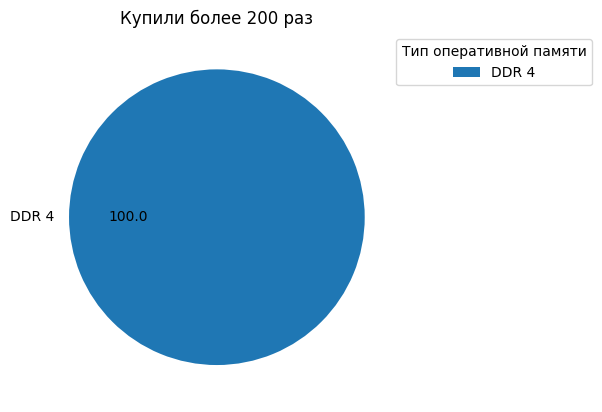

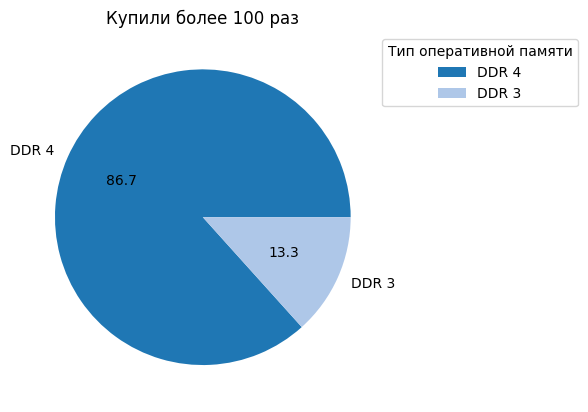

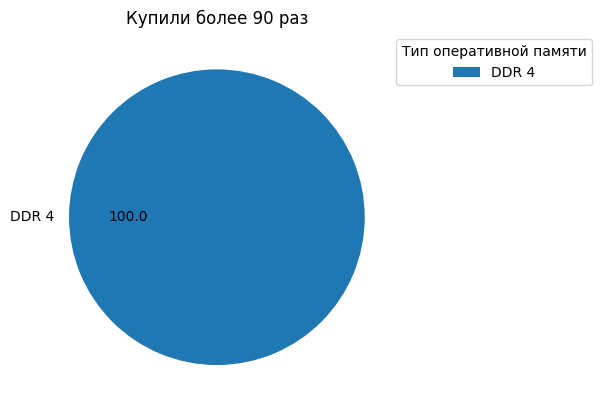

In [225]:
for sale_type in sale_types:
  df = top_5_type_ram_sale_dataset[top_5_type_ram_sale_dataset['Количество продаж']==sale_type]

  type_ram_counts = df['Тип оперативной памяти'].value_counts()
  labels = type_ram_counts.index
  colors = dict(zip(labels, plt.cm.tab20.colors[:len(labels)]))

  plt.title(sale_type)
  plt.pie(
      type_ram_counts.values,
      labels = labels,
      colors = [colors[key] for key in labels],
      autopct='%.1f'
      )
  plt.legend(labels, title='Тип оперативной памяти',loc="upper center", bbox_to_anchor=(1, 0, 0.5, 1))
  plt.show()


**Вывод:**
При анализе диаграмм по признаку Количество продаж - Тип оперативной памяти можно увидеть, что:
- более 500 раз были проданы компьютеры с типом оперативной памяти   DDR 4 (100 %).
- более 400 раз были проданы компьютеры с типом оперативной памяти DDR 4 (50 %) и DDR 3 (50%).
- более 300 раз были  проданы компьютеры с типом оперативной памяти DDR 4 (100 %).
- более 200 раз были  проданы компьютеры с типом оперативной памяти DDR 4  (100%).
- более 100 раз были проданы компьютеры с типом оперативной памяти DDR 4 (86,7%) и DDR 3 (13,3 %)
- более 90 раз были проданы компьютеры с установленной типом оперативной памяти DDR 4 (100)%  

# 5. Выводы

1.	Произведен анализ представленного датасета по данным одного из популярных онлайн-магазинов, содержащие информацию о товарах категории «Компьютеры и моноблоки».
2.	Датасет содержит 4500 строк (объектов) и 16 столбцов (признаков).
В ходе очистки данных были исключены:
признаки, не представляющие ценности в рамках указанных условий;
"полные" дубликаты (ошибочно задвоенные записи);
объекты, по которым не заполнена информация по признакам 'prise' (цена)
Были распакованы данные, представленные в формате json.
Значения признаков были преобразованы в  форматы, необходимые для последующего анализа.
По итогу преобразований датасет для анализа составляет 3069 строк (объектов) и 12 столбцов (признаков). (объектов) и 12 столбцов (признаков).
3.	Наибольшая цена компьютеров из интернет магазина - 235900.00, наименьшая цена: 254, что говорит о большом размахе значений, минимальная цена  противоречит здравому смыслу. При рассмотрении указанной записи сделать однозначный вывод не возможно, так как это не является не компютером (мышка, провод и т.п.) возможно произошла ошибка при вводе данных.
4.	Признак цена содержала незаполненые значения, поскольку данный признак важен для дальнейшего анализа, было принято решение об их исключении незаполненных значений. Средняя цена составляет 69 589.50, при этом медиана цены - 69 433.00. Цена в 90% рассматриваемых товаров не превышает 111 880.0
5.	При анализе комплектующих, которые использовались в сборке компьютеров можно сделать вывод о том, что на цену компьютера влияет вид видеопроцессора, типа процессора, количества ядер процессора, вид операционной системы, тип оперативной памяти, объем оперативной памяти, объема накопителя SDD, объема накопителя HDD.
6.	Наиболее часто встречаются в датасете следующие признаки:
по виду видеопроцессора - NVIDIA GeForce RTX 3060
типа процессора - intel core i5
количество ядер процессора – 6
вид операционной системы - Windows 10 Pro
тип оперативной памяти - DDR 4
объем оперативной памяти - от 16 до 32
объема накопителя HDD – от 1000 до 1300
объема накопителя SDD - от 16 до 32
7. При анализе признака Количество продаж можно сделать вывод о том, что наибольшей популярностью пользуются компьютеры по цене товара до 40 000 рублей
8. Наиболее популярными в сборке компонентами являются:
Видеопроцессор - AMD Radeon Vega 7 и NVIDIA GeForce GTX 1030
Операционная система -  windows 10 pro и windows пробная
Тип оперативной памяти - DDR 4  и DDR 3
Объем оперативной памяти  - от 14 до 16 Гб
Объем накопителя HDD в размере 1000 ГБ
Объем накопителя SDD в размере от 350 до 500 Гб
9. Необходимо отметить, что взаимосвязь между между количеством продаж и компонентами, такими как: видеопроцессор, операционная система тип оперативной памяти,  объемы оперативной памяти а также жестких дисков HDD и SDD не прослеживается. Это может говорить о том, что количество продаж не зависит от комплектующих.
10.Таким образом заказчику при планировании к сборке компьютеров следует ориентироваться на комплектующие, входящие в топ-5, топ-10, а при определении цены учитывать, что наибольшей популярностью пользуются компьютеры по цене товара до 40 000 рублей

